# **E-commerce Customer Churn**
### **Analysis by: Stefanus Felix Wigna Sunarto**

## **1. Business Problem Understanding**

**Backgound**

A certain e-commerce company wants to predict whether its customers will churn or not in the future. With accurate predictions, the e-commerce company can take appropriate actions to retain customers if they are predicted not to continue shopping on the e-commerce platform (churn).

**Problems Statement**

In the midst of a highly competitive market, an e-commerce company needs to mitigate the risk of losing customers (customer churn). Customer shopping activities constitute the main source of revenue for e-commerce companies. However, the company lacks a system to filter or predict whether a customer will churn or not. This leads to many customers unexpectedly moving to other e-commerce companies (churn), necessitating the company to engage in customer acquisition efforts to replace those who churn. Generally, the cost of customer acquisition is much higher than the cost of customer retention.

Therefore, it would be beneficial for the e-commerce company to mitigate the risk of customer churn. The first step is to have a metric or model that can predict whether a customer will churn or not. With the predictions in hand, the e-commerce company can take appropriate actions targeted at the right customers. This allows for more effective and efficient allocation of budget and resources towards customer retention efforts, thereby generating outcomes that align with the company's expectations.

**Goals**

- Based on the existing issue, the e-commerce company aims to develop a system that can predict whether customers will churn or not in the future.

- The company also wants to identify the features or factors that influence whether customers will churn or not.

**Analytic Approach**

The analytical approach used involves analyzing customer behavior patterns on the e-commerce platform, which can be used to classify customers predicted to churn and not churn. From this approach, a classification model can be created to predict whether customers will churn or not in the future.

**Metric Evaluation**

![confusion matrix](</Users/stefanusfelix/Documents/Purwadhika/Capstone Project Module 3/Confusion Matrix Churn.png>)


**False Positives (FP)**
- Customer is predicted to churn, but in reality, they do not churn (stay).

**Negative Impact**
- Opportunity Cost: Additional costs incurred to retain customers who are actually not at risk of churning. The allocation of funds could have been used for acquiring new business opportunities, such as acquiring new customers, expanding partnerships with retail stores, and others.

**Positive Impact**
- Increase in Retention Rate: By providing benefits to customers, loyalty to the e-commerce company increases. This helps mitigate the risk of customers churning or switching to competitors.

**False Negatives (FN)**
- Customer is predicted to stay (not churn), but in reality, they churn.

**Negative Impact**
- Revenue Loss: Missing the opportunity to retain customers who are actually at risk of churning. This leads to potential revenue loss from customers who churned and could have continued making purchases if retained.
  
- Cost of Reacquisition: Acquiring new customers to replace those who churned generally incurs higher costs compared to retaining existing customers.
  
- Long-Term Impact: If the customer churn rate is not reduced promptly, it can lead to a decrease in overall customer base, resulting in declining revenue and profits for the company. In the long term, this may impact the company's ability to sustain its business operations and compete effectively against competitors.

Therefore, e-commerce companies need to mitigate the risk of customer churn. Apart from ensuring long-term business sustainability, the cost of customer acquisition is significantly higher than the cost of customer retention.

![CAC vs CRC](https://blog.nextsale.io/wp-content/uploads/2020/05/Image_2.png)

**Churn Risk Mitigation**

The comparison between **customer retention cost : customer acquisition cost = 1 : 5**, where **customer acquisition cost** is **5 - 7 times** higher than **customer retention cost**.

Here are other supporting reasons why e-commerce companies should focus on customer retention rather than customer acquisition:

**a. Higher Return on Investment (ROI)**

Efforts to retain customers typically yield a higher Return on Investment (ROI) compared to efforts to acquire new customers. Research shows that increasing customer retention rates by just 5% can increase company profits by 25% to 95%. This is because retaining existing customers requires fewer resources and costs compared to acquiring new customers, making it a more cost-effective long-term strategy.

**b. Increasing Customer Lifetime Value (CLV)**

Loyal customers tend to make more transactions, add-on purchases, and recommend others to use the same e-commerce service (indirectly assisting the company's marketing efforts, whether through social media or word of mouth). A steady stream of revenue from loyal customers has the potential to boost the revenue and profitability of the e-commerce company in the long term.

**c. Reducing Marketing Costs**

Acquiring new customers requires significant investment in marketing campaigns and advertising to increase awareness and attract potential customers. In contrast, retaining existing customers by maintaining ongoing relationships can reduce the marketing costs incurred.

**d. Cross-Selling Opportunities**

Satisfied existing customers are more receptive to additional sales efforts. By leveraging customer data and behavior, e-commerce companies can identify opportunities to recommend other products that align with customer preferences. This not only has the potential to increase the company's revenue but also strengthens overall customer relationships and enhances customer satisfaction with the e-commerce services provided.

**Sources**: 
- https://www.getvendo.com/b/ecommerce-customer-retention-over-costly-acquisition 
- https://www.shopify.com/blog/customer-acquisition-cost#4
- https://www.forbes.com/sites/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/?sh=f93db631c7d6
- https://blog.nextsale.io/customer-retention/
- https://www.helpscout.com/blog/customer-retention-strategies-that-work/

**Business Case**

- Customer Retention Cost (CRC) = $50 / person 

- Customer Acquisition Cost (CAC) = $250 / person

**Scoring Method**

![Recall](https://blog.roboflow.com/content/images/2022/03/recall_formula.png)

By using `recall` as the scoring method, the focus of this model is to minimize the **False Negatives (FN)**. According to the recall scoring formula, the higher the recall score, the smaller the False Negatives (FN).

Therefore, this model will prioritize `recall` as the scoring method.

---

## **2. Data Understanding**

### **Data Information**

| Attribute | Data Type | Description | Variable Type
| --- | --- | --- | --- |
| Tenure | float64 | Tenure of a customer in the company | Numerical Continuous |
| WarehouseToHome | float64 | Distance between the warehouse to the customer’s home | Numerical Continuous |
| NumberOfDeviceRegistered | int64 | Total number of deceives is registered on a particular customer | Numerical Discrete |
| PreferedOrderCat | object | Preferred order category of a customer in the last month | Categorical Nominal |
| SatisfactionScore | int64 | Satisfactory score of a customer on service | Categorical Ordinal |
| MaritalStatus | object | Marital status of a customer | Categorical Nominal |
| NumberOfAddress | int64 | Total number of added on a particular customer | Numerical Discrete |
| Complaint | int64 | Any complaint has been raised in the last month | Categorical Nominal |
| DaySinceLastOrder | float64 | Day since last order by customer | Numerical Continuous |
| CashbackAmount | float64 | Average cashback in last month |  Numerical Continuous |
| Churn | int64 | Churn flag | Categorical Nominal |


---

## **3. Data Cleaning**

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore") 

### **Load Dataset**

In [2]:
df = pd.read_csv("/Users/stefanusfelix/Documents/Capstone Modul 3/E-commerce Customer Churn/data_ecommerce_customer_churn.csv")
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [3]:
df.shape

(3941, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [5]:
list_info = []
for i in df.columns :
    list_info.append([i,                                                        # nama kolom
                     df[i].dtype,                                               # data type
                     df[i].isna().sum(),                                        # jumlah missing values
                     round((df[i].isna().sum()/len(df[i])) * 100,2),            # persentase missing values
                     df[i].nunique(),                                           # jumlah unique values
                     list(df[i].unique())])                                     # list unique values

df_info = pd.DataFrame(columns=["Feature", "Data Type", "Null Value", "Null Value Percentage", "Nunique", "Unique Values"],
                       data = list_info)
df_info

,Feature,Data Type,Null Value,Null Value Percentage,Nunique,Unique Values
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


### **Remove Duplicates**

In [6]:
df.duplicated().sum()

671

In [7]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [8]:
df.shape

(3270, 11)

- Data duplikat sebanyak 671 baris, sehingga perlu dibuang.
- Setelah membuang data yang duplikat, jumlah baris yang awalnya berjumlah 3941 menjadi 3270, sudah sesuai.

### **Check & Drop Outliers**

In [9]:
# Numerical columns information
num_columns = df_info[((df_info["Data Type"] == "float64") | (df_info["Data Type"] == "int64")) & (df_info["Nunique"] > 2)]
num_columns

,Feature,Data Type,Null Value,Null Value Percentage,Nunique,Unique Values
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]"
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


In [10]:
list_min = []
list_max = []

for i in num_columns["Feature"]:
    min_values = df[i].min()
    max_values = df[i].max()

    list_min.append(min_values)
    list_max.append(max_values)

In [11]:
num_columns["Min Value"] = list_min
num_columns["Max Value"] = list_max

num_columns

,Feature,Data Type,Null Value,Null Value Percentage,Nunique,Unique Values,Min Value,Max Value
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,...",0.0,61.00
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0...",5.0,127.00
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]",1.0,6.00
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]",1.0,5.00
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]",1.0,22.00
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,...",0.0,46.00
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8...",0.0,324.99


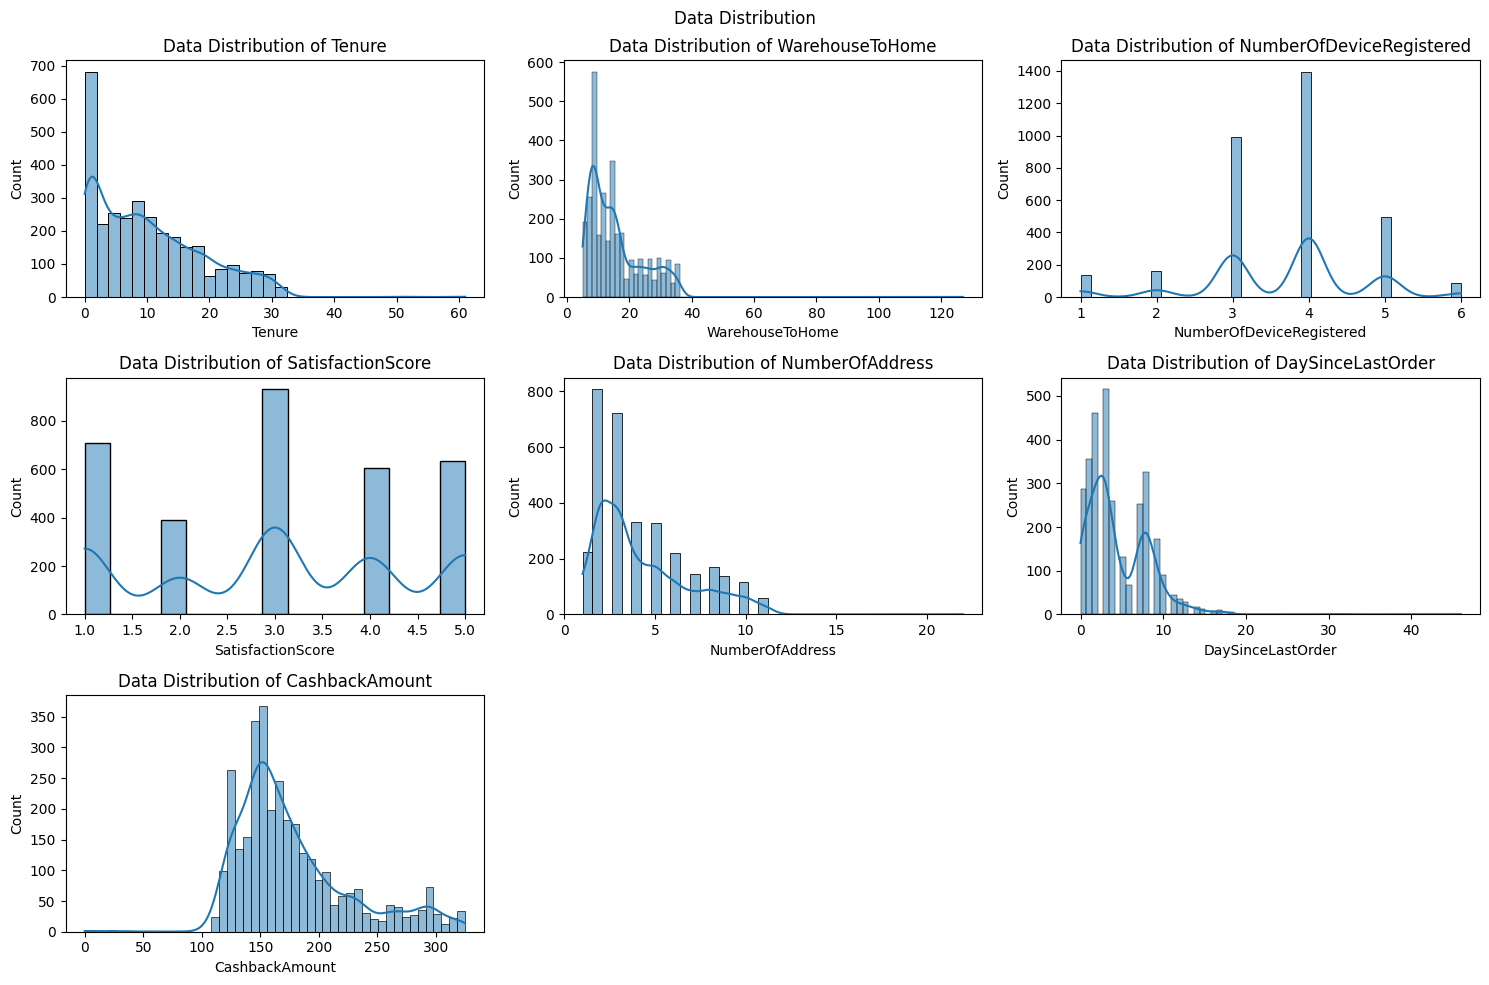

In [12]:
# Histogram

plt.figure(figsize=(15,10))
plt.suptitle("Data Distribution")

plot = 1

for i in num_columns["Feature"]:
    plt.subplot(3, 3, plot)

    sns.histplot(data = df, x = i, kde = True)

    plt.xlabel(i)
    plt.title(f"Data Distribution of {i}")
    plot += 1

plt.tight_layout()

plt.show()

Berdasarkan histogram di atas, terlihat bahwa setiap kolom numerikal memiliki data yang tidak terdistribusi normal.

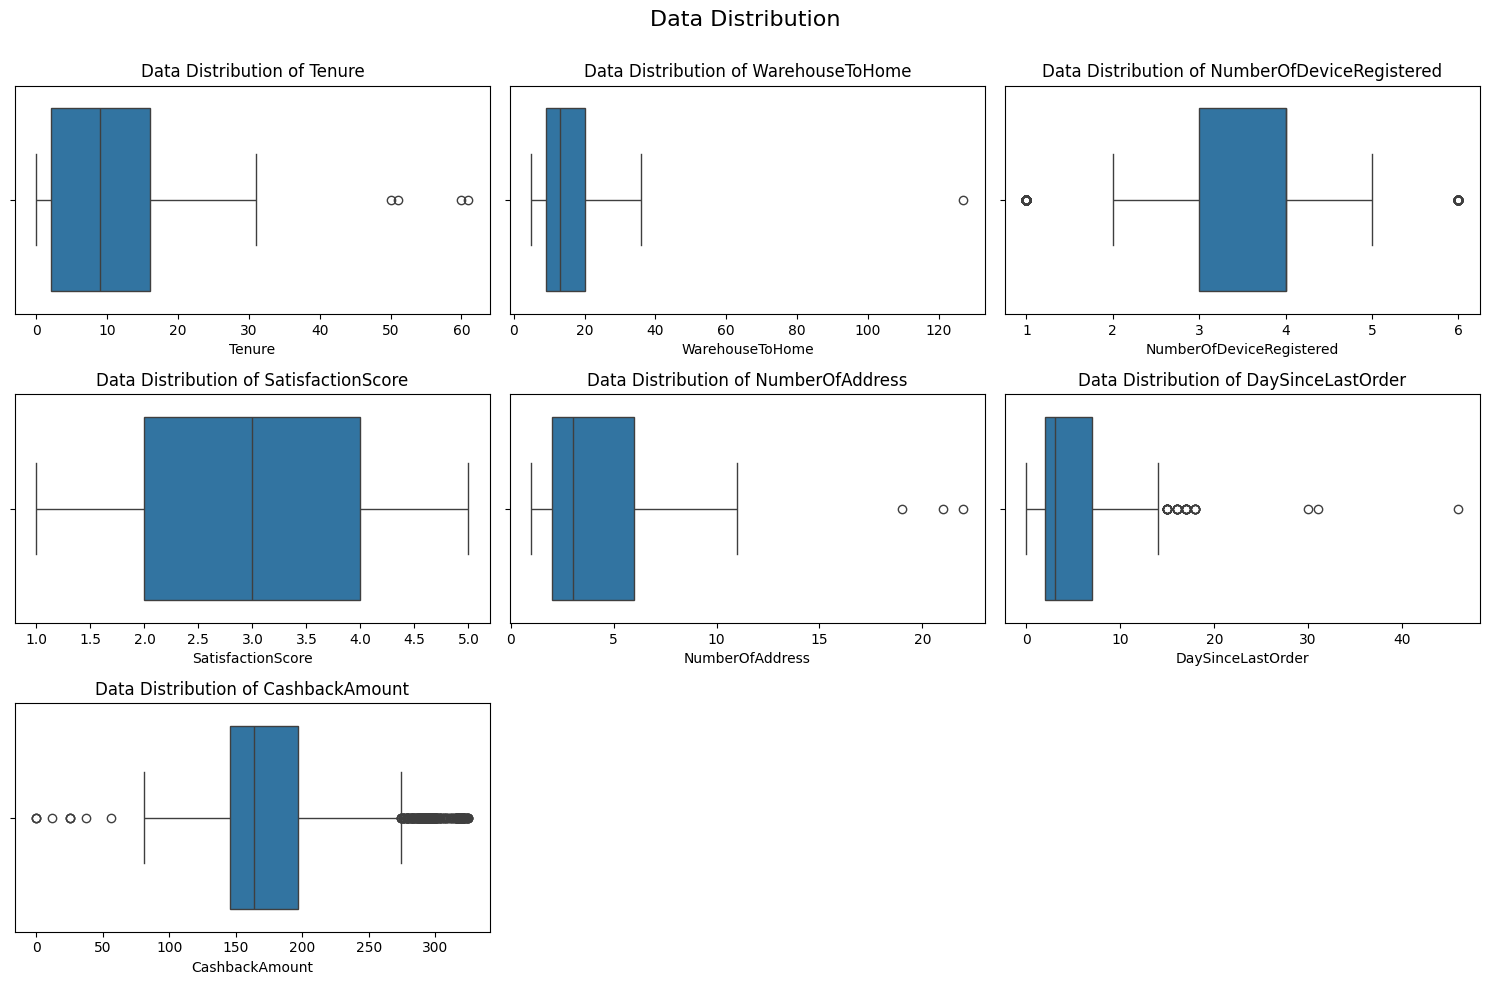

In [13]:
# Boxplot

plt.figure(figsize=(15,10))
plt.suptitle("Data Distribution\n", fontsize = 16)

plot = 1

for i in num_columns["Feature"]:
    plt.subplot(3, 3, plot)

    sns.boxplot(data = df, x = i)

    plt.xlabel(i)
    plt.title(f"Data Distribution of {i}")
    plot += 1

plt.tight_layout()

plt.show()

- Terdapat data outliers yang nilainya cukup jauh dari upper bound, yaitu pada kolom `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `DaySincelastOrder`.
- Karena nilainya terlalu jauh dari pesebaran dan jumlahnya sedikit, maka outliers tersebut dapat dibuang.

In [14]:
outliers = df[(df["Tenure"] > 40) | (df["WarehouseToHome"] > 40) | (df["NumberOfAddress"] > 15) | (df["DaySinceLastOrder"] > 25)]
outliers

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
51,61.0,28.0,4,Grocery,1,Married,6,1,1.0,303.75,0
181,3.0,11.0,3,Mobile,5,Married,6,0,30.0,132.04,0
449,51.0,7.0,2,Laptop & Accessory,3,Divorced,2,0,9.0,174.00,0
1209,60.0,27.0,3,Grocery,1,Married,5,1,0.0,278.75,0
1581,NaN,10.0,3,Mobile,2,Single,19,1,0.0,122.85,1
2109,13.0,16.0,4,Laptop & Accessory,4,Single,22,0,4.0,192.82,0
2717,26.0,127.0,4,Mobile Phone,1,Married,4,0,1.0,159.82,0
3494,12.0,15.0,3,Laptop & Accessory,4,Single,21,0,3.0,167.82,0
3591,0.0,6.0,4,Fashion,3,Married,6,0,46.0,206.09,1
3778,50.0,6.0,1,Laptop & Accessory,3,Divorced,1,0,8.0,149.00,0


In [15]:
# There are 11 rows of outliers
len(outliers)

11

In [16]:
# Shape before removing outliers
df.shape

(3270, 11)

In [17]:
# Shape after removing outliers
df.drop(index = outliers.index, inplace = True)
df.reset_index(drop = True, inplace = True)
df.shape

(3259, 11)

In [18]:
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3254,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3255,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3256,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3257,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


After removing the outliers, the number of rows, which initially was 3270, became 3259, which is correct.

### **Check Missing Values**

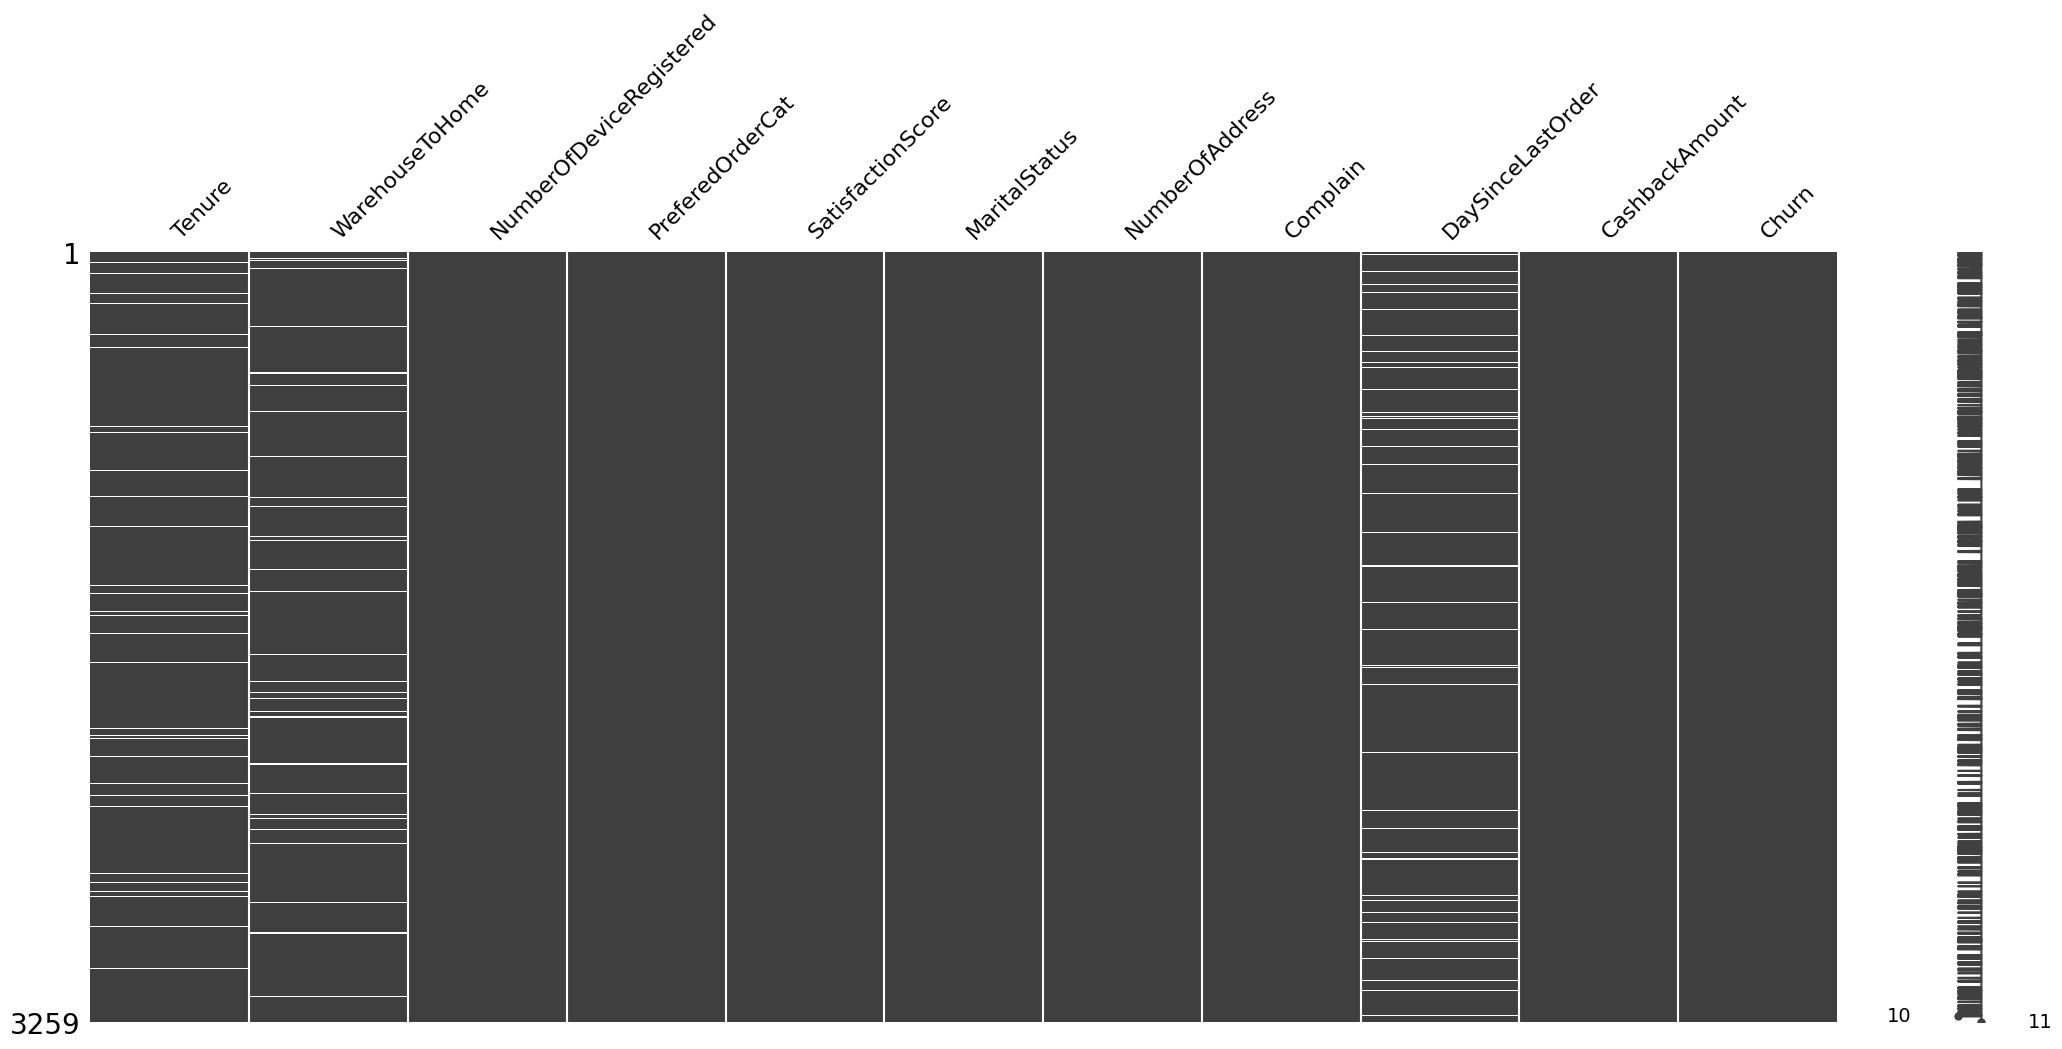

In [19]:
# Missingno matrix 
missingno.matrix(df);

Berdasarkan hasil grafik missingno, dapat diketahui bahwa terdapat 3 kolom yang memiliki missing values, yaitu `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder`. Ketiga kolom tersebut merupakan data numerik. 

In [20]:
# Number of missing values in each column
missing_values_count = df.isna().sum()
missing_values_count

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [21]:
# Percentage of missing values in each column
missing_values_percentage = (missing_values_count / len(df)) * 100
missing_values_percentage

Tenure                      4.878797
WarehouseToHome             4.142375
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
DaySinceLastOrder           5.553851
CashbackAmount              0.000000
Churn                       0.000000
dtype: float64

### **Fill Missing Values**

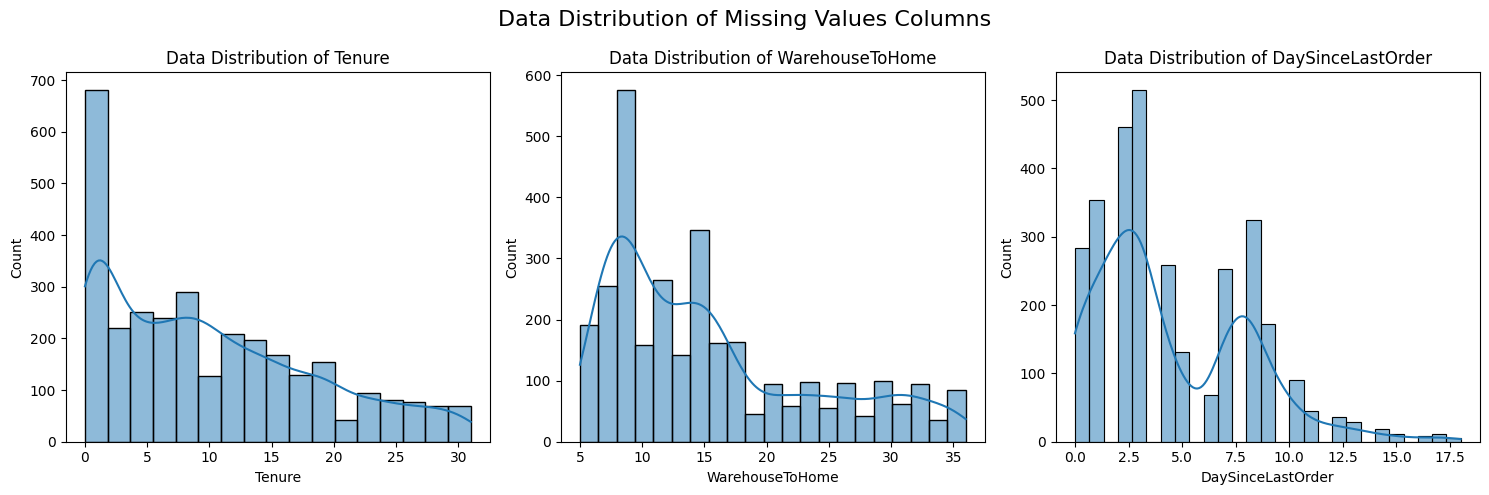

In [22]:
# Data distribution of columns with missing values

plt.figure(figsize=(15,5))
plt.suptitle("Data Distribution of Missing Values Columns", fontsize = 16)

columns = ["Tenure", "WarehouseToHome", "DaySinceLastOrder"]
plot = 1

for i in columns:
    plt.subplot(1, 3, plot)

    sns.histplot(data = df, x = i, kde = True)

    plt.xlabel(i)
    plt.title(f"Data Distribution of {i}")
    plot += 1

plt.tight_layout()

In [23]:
columns = ["Tenure", "WarehouseToHome", "DaySinceLastOrder"]
list_mean = []
list_median = []

for i in columns: 
    mean = df[i].mean()
    median = df[i].median()

    list_mean.append(mean)
    list_median.append(median)

In [24]:
df_mean_median = pd.DataFrame()
df_mean_median["Missing Values Column"] = columns
df_mean_median["Mean Value"] = list_mean
df_mean_median["Median_Value"] = list_median

df_mean_median

,Missing Values Column,Mean Value,Median_Value
0,Tenure,10.132903,9.0
1,WarehouseToHome,15.480154,13.0
2,DaySinceLastOrder,4.518519,3.0


In [25]:
columns = ["Tenure", "WarehouseToHome", "DaySinceLastOrder"]

for i in columns:
    print(i)
    print(df[i].unique())
    print()

Tenure
[15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28.]

WarehouseToHome
[29. 25. 13. 15. 16. 11. 12.  7. 26. 20. 14.  8. 21. 22. 27. 18. 33.  9.
 17. nan  6. 31. 10. 19. 32. 23. 30. 35. 34. 24.  5. 28. 36.]

DaySinceLastOrder
[ 7. nan  8. 11.  2.  1.  4.  3.  6.  0. 14.  9. 10. 12.  5. 17. 18. 16.
 13. 15.]



- The three columns (`Tenure`, `WarehouseToHome`, `DaySinceLastOrder`) with missing values have data distributions that are not normal or skewed to the right.
- Therefore, missing values in each column can be filled with the median value.
- They are not filled using techniques like iterative imputer or KNN imputer because the values in each column are integers. Iterative imputer or KNN imputer techniques could potentially produce decimal numbers, which would not be suitable in this case.

In [26]:
# Number of rows with missing values
missing_values_count[missing_values_count > 0]

Tenure               159
WarehouseToHome      135
DaySinceLastOrder    181
dtype: int64

In [27]:
# Number of rows with median values in columns containing missing values
# Before filling

columns = ["Tenure", "WarehouseToHome", "DaySinceLastOrder"]

for i in columns:
    print(i)
    print(len(df[df[i] == df[i].median()]))
    print()

Tenure
139

WarehouseToHome
142

DaySinceLastOrder
515



In [28]:
# Fill missing values

columns = ["Tenure", "WarehouseToHome", "DaySinceLastOrder"]

for i in columns:
    df[i].fillna(df[i].median(), inplace = True)

In [29]:
# Number of rows with median values in columns containing missing values
# After filling 

columns = ["Tenure", "WarehouseToHome", "DaySinceLastOrder"]

for i in columns:
    print(i)
    print(len(df[df[i] == df[i].median()]))
    print()

Tenure
298

WarehouseToHome
277

DaySinceLastOrder
696



After filling them in, the count of median values increased according to the number of missing values, so it's correct.

In [30]:
df.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

In [31]:
df.shape

(3259, 11)

After filling in the missing values, there are no columns left with missing values.

---

## **4. Exploratory Data Analysis (EDA)**

In [32]:
# Numerical data information
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000
mean,10.077631,15.377416,3.678122,3.021172,4.206812,0.281681,4.434182,177.389322,0.163240
std,8.293336,8.177132,1.017247,1.394933,2.577504,0.449888,3.477924,49.288183,0.369641
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.885000,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.880000,0.000000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.135000,0.000000
max,31.000000,36.000000,6.000000,5.000000,11.000000,1.000000,18.000000,324.990000,1.000000


In [33]:
# Object data information
df.describe(include = "O")

,PreferedOrderCat,MaritalStatus
count,3259,3259
unique,6,3
top,Laptop & Accessory,Married
freq,1209,1680


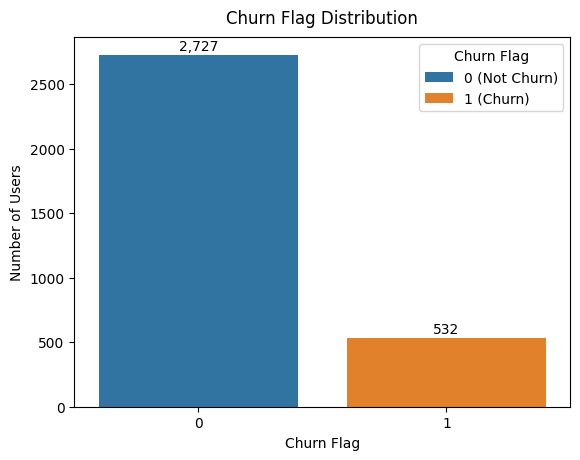

In [34]:
bar_churn = sns.countplot(data = df, x = "Churn", hue = "Churn")

for i in bar_churn.patches:
   bar_churn.annotate(format(i.get_height(), f",.0f"),
                           (i.get_x() + i.get_width() / 2,
                           i.get_height() - 20), 
                           ha = "center", 
                           va = "center",
                           size = 10, 
                           xytext = (0, 8),
                           textcoords = "offset points")
   
bar_churn.set_title("Churn Flag Distribution", pad = 10)
   
bar_churn.set(xlabel = "Churn Flag", ylabel = "Number of Users")

plt.legend(title = "Churn Flag", loc = "upper right", labels = ["0 (Not Churn)", "1 (Churn)"])

plt.show()

- There are more customers who do not churn compared to those who churn.
- The ratio is approximately 5 (not churn) : 1 (churn).
- Therefore, the data is imbalanced, requiring **imbalance treatment**.

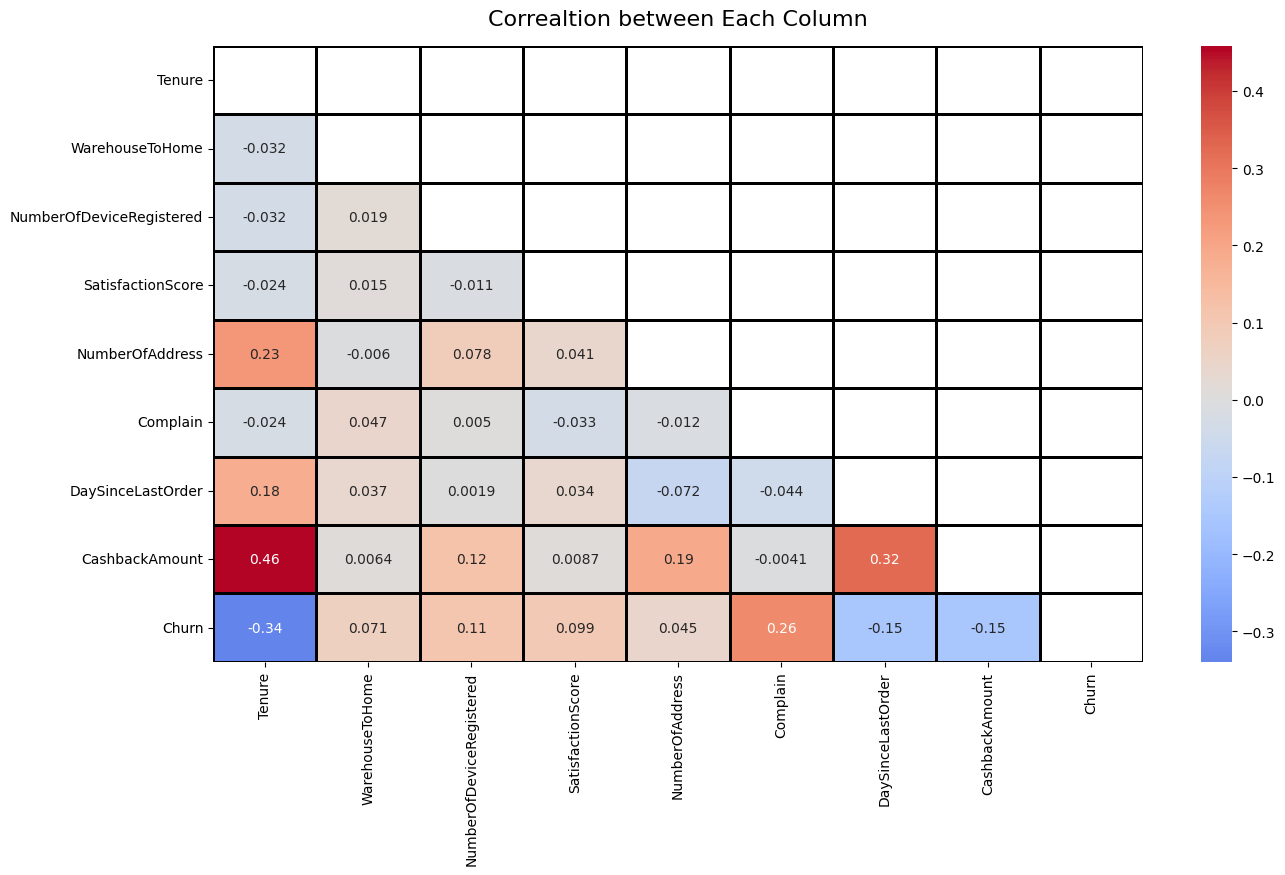

In [35]:
# Heatmap 

matrix = np.triu(df.corr(numeric_only = True))

plt.figure(figsize = (15, 8))

plot = sns.heatmap(data = df.corr(numeric_only = True),
                    annot = True,
                    cmap = "coolwarm",
                    center = 0,
                    mask = matrix,
                    linewidths = 1,
                    linecolor = "black")


plot.set_title("Correaltion between Each Column", fontsize = 16, pad = 15)
plt.show()

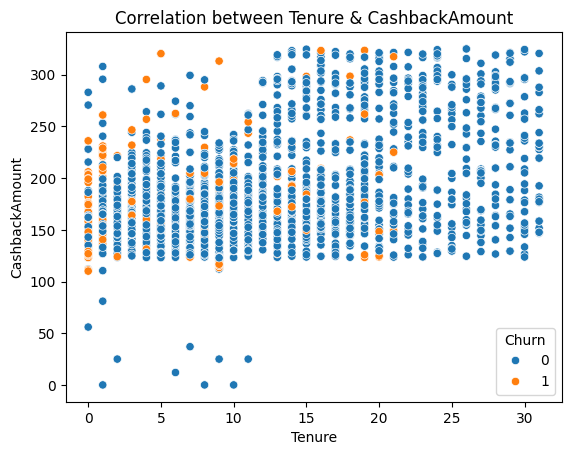

In [36]:
# Scatterplot correlation 'Tenure' & 'CashbackAmount'

plt.title("Correlation between Tenure & CashbackAmount")
sns.scatterplot(data = df, x = "Tenure", y = "CashbackAmount", hue = "Churn")
plt.show()

- `Tenure` and `CashbackAmount` have the highest correlation value among other columns. However, their correlation coefficient is only 0.46, which falls into the category of moderate correlation. Thus, it can be concluded that each column does not exhibit strong correlation with one another.
- This phenomenon occurs because as the `Tenure` (length of time a customer has been using the service) increases, the e-commerce company tends to provide rewards to these customers, including larger `CashbackAmount`, to enhance satisfaction and loyalty.
- However, the e-commerce company also aims to retain newly joined customers (with lower tenure) by offering substantial cashback amounts. Yet, customers with low tenure receiving large cashbacks tend to churn.
- This happens because these customers are initially attracted to join due to the cashback offered by the e-commerce company. After receiving the cashback, they leave the e-commerce service (**churn**).

In [37]:
churn_corr = df.corr(numeric_only = True).loc["Churn"][:-1]
churn_corr 

Tenure                     -0.339551
WarehouseToHome             0.070699
NumberOfDeviceRegistered    0.109577
SatisfactionScore           0.099253
NumberOfAddress             0.044772
Complain                    0.262360
DaySinceLastOrder          -0.154708
CashbackAmount             -0.151388
Name: Churn, dtype: float64

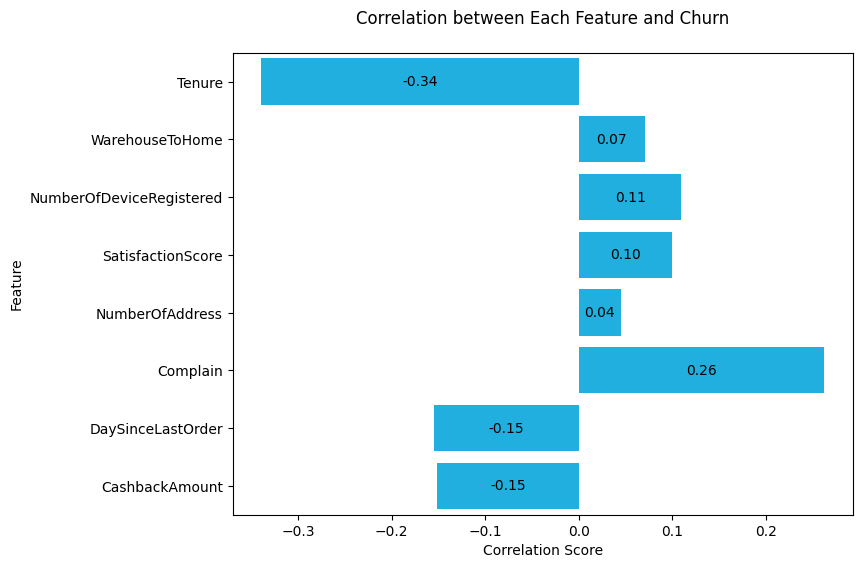

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x = churn_corr.values, y = churn_corr.index, orient = "h", color = "deepskyblue") 
ax.set_ylabel("Feature")    
ax.set_xlabel("Correlation Score")
ax.bar_label(ax.containers[0], fmt= "%0.2f" , label_type = "center")
plt.title("Correlation between Each Feature and Churn\n")
plt.show()

Based on the heatmap and bar chart above, each feature column shows correlations with the target variable (`Churn`), both positive and negative:

Positive relationships:
- `NumberofDeviceRegistered` and `Churn` have a positive relationship, indicating that the more devices a customer registers, the more likely they are to churn, and vice versa.
- `SatisfactionScore` and `Churn` have a positive relationship, implying that higher satisfaction scores lead to a higher likelihood of churn, and conversely.
- `Complain` and `Churn` have a positive relationship, suggesting that customers who complain are more likely to churn, and vice versa.

Negative relationships:
- `Tenure` and `Churn` have a negative relationship, indicating that the longer a customer uses the e-commerce service, the less likely they are to churn. This could be because longer-tenured customers tend to be more comfortable and loyal over time.
- `DaySinceLastOrder` and `Churn` have a negative relationship, implying that the longer the time since the customer's last order, the less likely they are to churn.
- `CashbackAmount` and `Churn` have a negative relationship, indicating that the larger the cashback amount provided by the e-commerce company to the customer, the less likely they are to churn. This is because customers are price-sensitive and seek out products or services that provide them the most benefit.

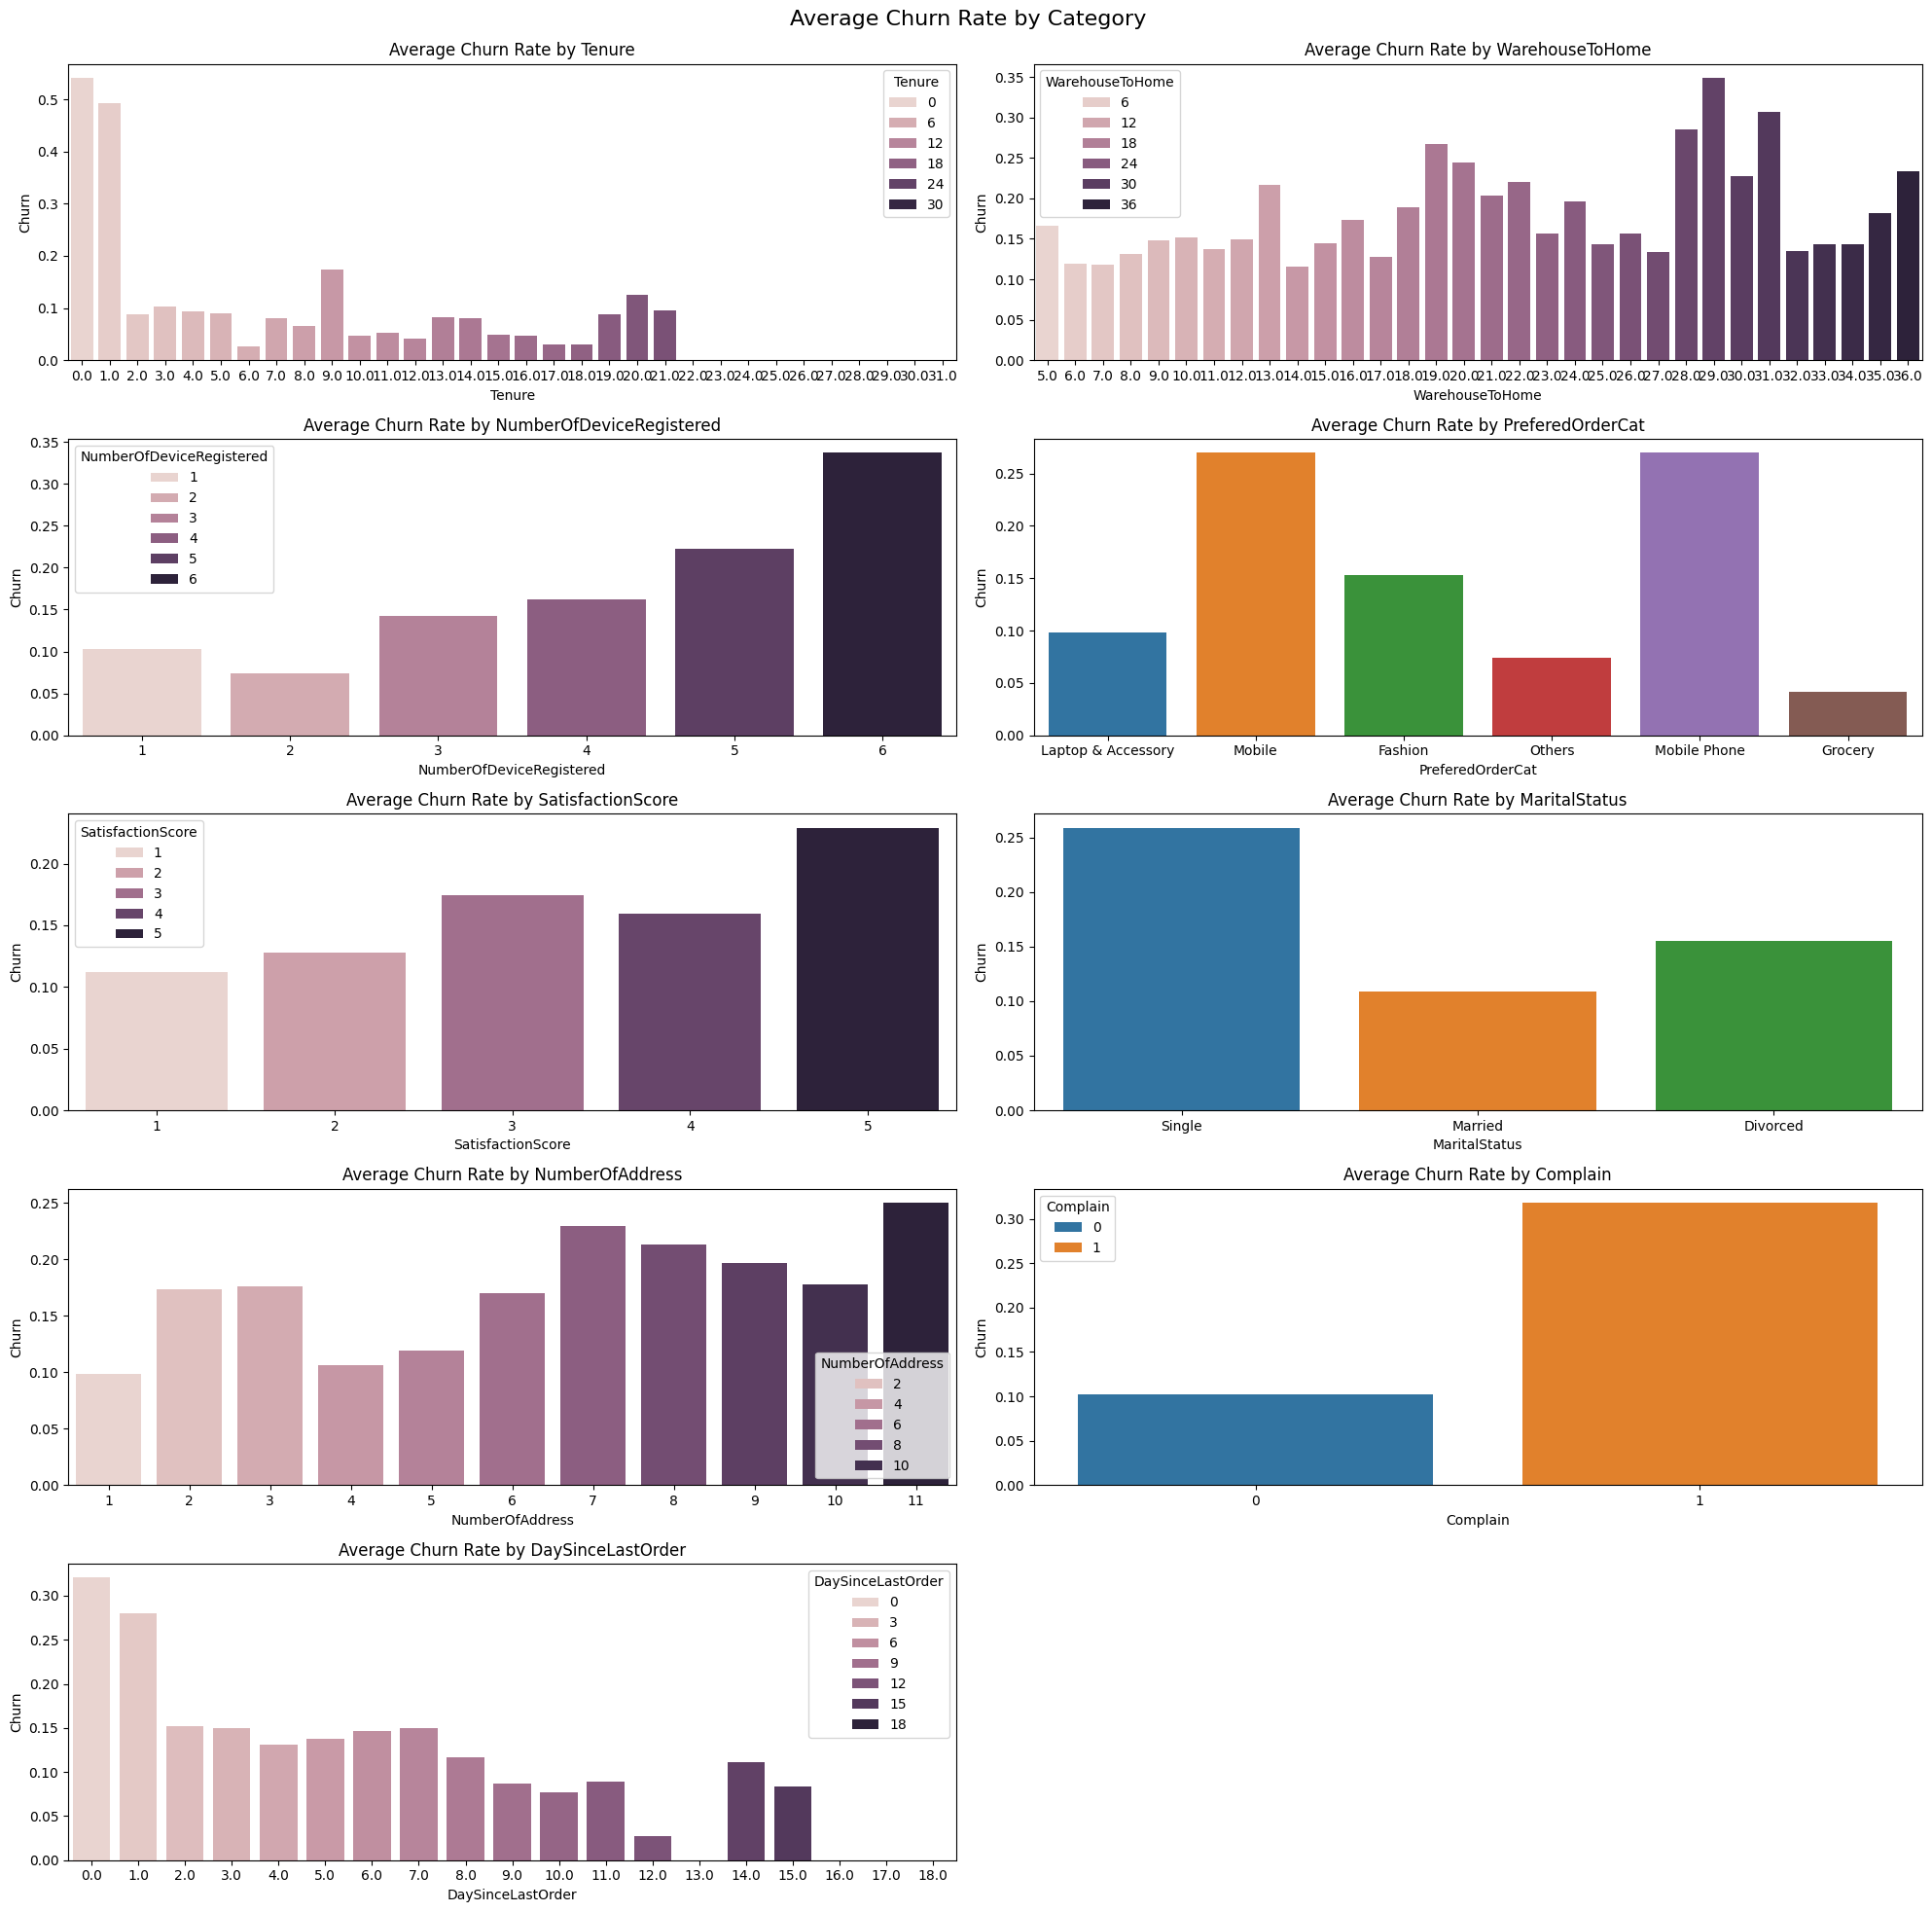

In [151]:
# Bar chart

plt.figure(figsize=(20,20))
plt.suptitle("Average Churn Rate by Category\n", fontsize = 16)

plot = 1

for i in df.drop(columns = ["Churn", "CashbackAmount"]).columns:
    plt.subplot(5, 2, plot)

    barplot = sns.barplot(data = df, x = i, y = "Churn", ci = 0, hue = i)

    plt.xlabel(i)
    plt.title(f"Average Churn Rate by {i}")
    plot += 1

plt.tight_layout()

plt.show()

- `Tenure`: The shorter the duration a customer uses the e-commerce service, the more likely they are to churn.
- `NumberOfDeviceRegistered`: The higher the number of devices registered, the more likely they are to churn, except for customers registering 2 devices, which have the lowest average churn rate.
- `PreferedOrderCat`: Customers preferring categories like **Mobile** and **Mobile Phone** products tend to have the highest average churn rate.
- `SatisfactionScore`: Higher satisfaction scores given by customers correlate with a higher likelihood to churn.
- `MaritalStatus`: Customers who are **Single** tend to have the highest average churn rate.
- `NumberOfAddress`: Customers with 7 to 11 registered addresses have the highest average churn rate.
- `Complain`: Customers who have filed complaints tend to churn more.
- `DaySinceLastOrder`: The shorter the time since the customer's last order, the more likely they are to churn.

In [40]:
for i in df.drop(columns = "Churn").columns:
    df_dist = df.groupby(i)["Churn"].value_counts(normalize = True).unstack()           # normalize --> menampilkan persentase muncul
    df_dist.rename(columns = {0 : "0: Not Churn", 1 : "1: Churn"}, inplace = True)      # rename column --> 0: Not Churn, 1: Churn
    df_dist.sort_values(by = "1: Churn", ascending = False, inplace= True)              # sorting berdasarkan nilai "Churn" terbanyak

    print(i)
    display(df_dist)

Tenure


Churn,0: Not Churn,1: Churn
Tenure,,
0.0,0.459075,0.540925
1.0,0.507500,0.492500
9.0,0.825503,0.174497
20.0,0.875000,0.125000
3.0,0.897436,0.102564
21.0,0.904762,0.095238
4.0,0.906977,0.093023
5.0,0.910569,0.089431
19.0,0.911111,0.088889


WarehouseToHome


Churn,0: Not Churn,1: Churn
WarehouseToHome,,
29.0,0.651163,0.348837
31.0,0.693548,0.306452
28.0,0.714286,0.285714
19.0,0.733333,0.266667
20.0,0.756098,0.243902
36.0,0.766667,0.233333
30.0,0.771930,0.228070
22.0,0.779661,0.220339
13.0,0.783394,0.216606


NumberOfDeviceRegistered


Churn,0: Not Churn,1: Churn
NumberOfDeviceRegistered,,
6,0.662921,0.337079
5,0.776876,0.223124
4,0.838246,0.161754
3,0.857287,0.142713
1,0.897059,0.102941
2,0.925926,0.074074


PreferedOrderCat


Churn,0: Not Churn,1: Churn
PreferedOrderCat,,
Mobile,0.730263,0.269737
Mobile Phone,0.730290,0.269710
Fashion,0.846791,0.153209
Laptop & Accessory,0.901572,0.098428
Others,0.926174,0.073826
Grocery,0.958159,0.041841


SatisfactionScore


Churn,0: Not Churn,1: Churn
SatisfactionScore,,
5,0.770932,0.229068
3,0.825619,0.174381
4,0.840532,0.159468
2,0.872123,0.127877
1,0.887784,0.112216


MaritalStatus


Churn,0: Not Churn,1: Churn
MaritalStatus,,
Single,0.741294,0.258706
Divorced,0.844948,0.155052
Married,0.891071,0.108929


NumberOfAddress


Churn,0: Not Churn,1: Churn
NumberOfAddress,,
11,0.750000,0.250000
7,0.770833,0.229167
8,0.786982,0.213018
9,0.802920,0.197080
10,0.822034,0.177966
3,0.824343,0.175657
2,0.826733,0.173267
6,0.830275,0.169725
5,0.881098,0.118902


Complain


Churn,0: Not Churn,1: Churn
Complain,,
1,0.681917,0.318083
0,0.897480,0.102520


DaySinceLastOrder


Churn,0: Not Churn,1: Churn
DaySinceLastOrder,,
0.0,0.679577,0.320423
1.0,0.720339,0.279661
2.0,0.848156,0.151844
7.0,0.849802,0.150198
3.0,0.850575,0.149425
6.0,0.852941,0.147059
5.0,0.862595,0.137405
4.0,0.868726,0.131274
8.0,0.883077,0.116923


CashbackAmount


Churn,0: Not Churn,1: Churn
CashbackAmount,,
110.09,NaN,1.0
166.96,NaN,1.0
166.71,NaN,1.0
165.84,NaN,1.0
165.31,NaN,1.0
...,...,...
323.33,1.0,NaN
324.26,1.0,NaN
324.43,1.0,NaN


- `Tenure`: Tenure in the range of 22 - 31 has the lowest churn percentage.
- `NumberOfDeviceRegistered`: Customers with 3 - 6 registered devices have the highest churn percentage.
- `PreferedOrderCat`: Categories like mobile and mobile phone products have the highest churn percentage.
- `SatisfactionScore`: Customers with a satisfaction score of 5 have the highest churn percentage.
- `MaritalStatus`: Single customers have the highest churn percentage.
- `Complain`: Customers who have filed complaints have a higher churn percentage compared to those who have not.

---

## **5. Define X & y**

In [41]:
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3254,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3255,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3256,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3257,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


In [42]:
# X = Feature 
# y = Target

X = df.drop(columns = "Churn")
y = df["Churn"]

In [43]:
X

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17
...,...,...,...,...,...,...,...,...,...,...
3254,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90
3255,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99
3256,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86
3257,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80


In [44]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3254    0
3255    0
3256    0
3257    0
3258    0
Name: Churn, Length: 3259, dtype: int64

---

## **6. Data Splitting**

In [45]:
# Data splitting library
from sklearn.model_selection import train_test_split

In [ ]:
# Spliting data train : data test = 80 : 20 

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y)

Performing a data split of 20% for testing data and 80% for training data. The 80% split for training data allows the model to learn from the majority of the available data, thereby potentially producing better and more accurate predictions.

In [47]:
X_train

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
1245,20.0,9.0,3,Grocery,3,Married,10,1,13.0,237.70
647,13.0,7.0,3,Fashion,2,Married,2,0,3.0,221.13
1776,11.0,12.0,4,Laptop & Accessory,3,Married,3,0,7.0,153.21
2226,3.0,13.0,3,Mobile,4,Single,1,0,2.0,129.83
2101,14.0,6.0,4,Others,3,Married,2,0,10.0,291.89
...,...,...,...,...,...,...,...,...,...,...
1772,29.0,15.0,5,Grocery,4,Married,3,1,1.0,260.77
936,9.0,23.0,4,Mobile,4,Divorced,2,0,0.0,121.27
189,16.0,14.0,3,Laptop & Accessory,4,Married,5,0,0.0,147.65
2245,0.0,35.0,3,Laptop & Accessory,3,Married,6,0,0.0,143.06


In [48]:
y_train

1245    0
647     0
1776    0
2226    0
2101    0
       ..
1772    0
936     0
189     0
2245    0
2723    1
Name: Churn, Length: 2607, dtype: int64

In [49]:
X_test

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
2376,8.0,13.0,5,Laptop & Accessory,4,Married,8,0,1.0,170.05
1660,17.0,10.0,3,Laptop & Accessory,4,Single,10,0,3.0,159.33
2482,4.0,14.0,4,Mobile Phone,3,Married,3,0,1.0,137.74
1991,10.0,15.0,5,Fashion,5,Single,3,0,10.0,200.87
888,30.0,35.0,4,Grocery,2,Married,4,0,0.0,241.18
...,...,...,...,...,...,...,...,...,...,...
2085,7.0,13.0,3,Mobile,5,Divorced,5,0,2.0,123.62
1883,8.0,7.0,2,Laptop & Accessory,2,Married,2,0,3.0,222.25
1953,17.0,17.0,4,Mobile Phone,2,Single,2,0,8.0,149.55
1665,4.0,7.0,4,Mobile Phone,3,Married,2,0,4.0,145.64


In [50]:
y_test

2376    0
1660    0
2482    0
1991    0
888     0
       ..
2085    1
1883    0
1953    0
1665    0
199     0
Name: Churn, Length: 652, dtype: int64

---

## **7. Data Preprocessing**

In [51]:
# Preprocessing library

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# Scaling
from sklearn.preprocessing import RobustScaler

# Columnn transformer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

**1. Encoding**

**OneHotEncoder: MaritalStatus**

- MaritalStatus has 3 unique values: 'Single', 'Married', and 'Divorced'. These categorical values need to be encoded for use in machine learning models. Since the number of unique values is small and there is no inherent order (hierarchy), OneHotEncoder will be used. OneHotEncoder will create 3 additional columns corresponding to the number of unique values.

**BinaryEncoder: PreferedOrderCat**

- PreferedOrderCat has 6 unique values: 'Laptop & Accessory', 'Mobile', 'Fashion', 'Others', 'Mobile Phone', 'Grocery'. These categorical values need to be encoded for use in machine learning models. Since the number of unique values exceeds 3 and there is no inherent order (hierarchy), BinaryEncoder will be more suitable. BinaryEncoder will create 3 additional columns as follows:
  - Number of unique values = 6 --> (1 1 0) --> 3 columns (1, 1, 0)

</br>

**2. Scaling**

**RobustScaler: Tenure, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, DaySinceLastOrder, CashbackAmount**

- Each of these columns contains numerical data, which will benefit from normalization through scaling. RobustScaler will be used for this purpose, as it is suitable for data that is not normally distributed.

</br>

**3. Passthrough**

**Passthrough: Complain**

- Complain contains binary values 0 and 1, where 0 represents 'not complain' and 1 represents 'complain'. This data does not require encoding or scaling and will be passed through as is.



In [52]:
X

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17
...,...,...,...,...,...,...,...,...,...,...
3254,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90
3255,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99
3256,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86
3257,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80


In [53]:
transformer = ColumnTransformer([
                                    ("OneHotEncoder", OneHotEncoder(drop = "first"), ["MaritalStatus"]),
                                    ("BinaryEncoder", BinaryEncoder(), ["PreferedOrderCat"]),
                                    ("RobustScaler", RobustScaler(), ["Tenure", "WarehouseToHome", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress", "DaySinceLastOrder", "CashbackAmount"])
                                ], remainder = "passthrough")

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['MaritalStatus']),
                                ('BinaryEncoder', BinaryEncoder(),
                                 ['PreferedOrderCat']),
                                ('RobustScaler', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount'])])

In [54]:
# Fitting
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['MaritalStatus']),
                                ('BinaryEncoder', BinaryEncoder(),
                                 ['PreferedOrderCat']),
                                ('RobustScaler', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount'])])

In [55]:
transformer.transformers_

[('OneHotEncoder', OneHotEncoder(drop='first'), ['MaritalStatus']),
 ('BinaryEncoder',
  BinaryEncoder(cols=['PreferedOrderCat'],
                mapping=[{'col': 'PreferedOrderCat',
                          'mapping':     PreferedOrderCat_0  PreferedOrderCat_1  PreferedOrderCat_2
   1                   0                   0                   1
   2                   0                   1                   0
   3                   0                   1                   1
   4                   1                   0                   0
   5                   1                   0                   1
   6                   1                   1                   0
  -1                   0                   0                   0
  -2                   0                   0                   0}]),
  ['PreferedOrderCat']),
 ('RobustScaler',
  RobustScaler(),
  ['Tenure',
   'WarehouseToHome',
   'NumberOfDeviceRegistered',
   'SatisfactionScore',
   'NumberOfAddress',
   'DaySinceLastOrde

In [56]:
# Putting each column name resulting from preprocessing into a list

list_columns = []

for i in range (len(transformer.transformers_)):
    column = list(transformer.transformers_[i][1].get_feature_names_out())
    
    for j in column:
        list_columns.append(j)

In [57]:
# List of columns resulting from preprocessing
list_columns

['MaritalStatus_Married',
 'MaritalStatus_Single',
 'PreferedOrderCat_0',
 'PreferedOrderCat_1',
 'PreferedOrderCat_2',
 'Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'DaySinceLastOrder',
 'CashbackAmount',
 'Complain']

In [58]:
# Result of preprocessing X_train
pd.DataFrame(transformer.transform(X_train), columns = list_columns)

,MaritalStatus_Married,MaritalStatus_Single,PreferedOrderCat_0,PreferedOrderCat_1,PreferedOrderCat_2,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,DaySinceLastOrder,CashbackAmount,Complain
0,1.0,0.0,0.0,0.0,1.0,0.916667,-0.363636,-1.0,0.0,1.75,2.0,1.471107,1.0
1,1.0,0.0,0.0,1.0,0.0,0.333333,-0.545455,-1.0,-0.5,-0.25,0.0,1.142631,0.0
2,1.0,0.0,0.0,1.0,1.0,0.166667,-0.090909,0.0,0.0,0.00,0.8,-0.203786,0.0
3,0.0,1.0,1.0,0.0,0.0,-0.500000,0.000000,-1.0,0.5,-0.50,-0.2,-0.667261,0.0
4,1.0,0.0,1.0,0.0,1.0,0.416667,-0.636364,0.0,0.0,-0.25,1.4,2.545346,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,1.0,0.0,0.0,0.0,1.0,1.666667,0.181818,1.0,0.5,0.00,-0.4,1.928437,1.0
2603,0.0,0.0,1.0,0.0,0.0,0.000000,0.909091,0.0,0.5,-0.25,-0.6,-0.836951,0.0
2604,1.0,0.0,0.0,1.0,1.0,0.583333,0.090909,-1.0,0.5,0.50,-0.6,-0.314005,0.0
2605,1.0,0.0,0.0,1.0,1.0,-0.750000,2.000000,-1.0,0.0,0.75,-0.6,-0.404996,0.0


In [59]:
# Result of preprocessing X_test
pd.DataFrame(transformer.transform(X_test), columns = list_columns)

,MaritalStatus_Married,MaritalStatus_Single,PreferedOrderCat_0,PreferedOrderCat_1,PreferedOrderCat_2,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,DaySinceLastOrder,CashbackAmount,Complain
0,1.0,0.0,0.0,1.0,1.0,-0.083333,0.000000,1.0,0.5,1.25,-0.4,0.130043,0.0
1,0.0,1.0,0.0,1.0,1.0,0.666667,-0.272727,-1.0,0.5,1.75,0.0,-0.082466,0.0
2,1.0,0.0,1.0,1.0,0.0,-0.416667,0.090909,0.0,0.0,0.00,-0.4,-0.510457,0.0
3,0.0,1.0,0.0,1.0,0.0,0.083333,0.181818,1.0,1.0,0.00,1.4,0.741005,0.0
4,1.0,0.0,0.0,0.0,1.0,1.750000,2.000000,0.0,-0.5,0.25,-0.6,1.540093,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0.0,0.0,1.0,0.0,0.0,-0.166667,0.000000,-1.0,1.0,0.50,-0.2,-0.790366,0.0
648,1.0,0.0,0.0,1.0,1.0,-0.083333,-0.545455,-2.0,-0.5,-0.25,0.0,1.164833,0.0
649,0.0,1.0,1.0,1.0,0.0,0.666667,0.363636,0.0,-0.5,-0.25,1.0,-0.276341,0.0
650,1.0,0.0,1.0,1.0,0.0,-0.416667,-0.545455,0.0,0.0,-0.25,0.2,-0.353851,0.0


The two DataFrames above are the result of preprocessing on X train and X test.

---

## **8. Cross Validation**

In [60]:
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# Metric
from sklearn.metrics import recall_score

In [61]:
# Define algorithm
logreg = LogisticRegression(random_state = 0)
knn = KNeighborsClassifier()
dectree = DecisionTreeClassifier(random_state = 0)
rf = RandomForestClassifier(random_state = 0)
gradboost = GradientBoostingClassifier(random_state = 0)
xgb = XGBClassifier()
gnb = GaussianNB()
svm = svm.SVC(kernel = "linear", random_state = 0)

In [62]:
list_algo = [logreg, knn, dectree, rf, gradboost, xgb, gnb, svm]
list_all_acc = []
list_mean_acc = []
list_std_acc = []

for model in list_algo:

    # Pipeline
    pipe_prep_model = Pipeline([
        ("preprocessing", transformer),
        ("modeling", model),
    ])

    # Define KFold 
    fold = StratifiedKFold(n_splits = 10)

    # Cross validation score
    cross_val = cross_val_score(estimator = pipe_prep_model,    
                                X =  X_train,
                                y = y_train,
                                cv = fold,                      
                                scoring = "recall") 
    
    # List recall score & std
    list_all_acc.append(cross_val.round(2))
    list_mean_acc.append(cross_val.mean())
    list_std_acc.append(cross_val.std())

In [63]:
# DataFrame Cross Validation

df_cv = pd.DataFrame()
df_cv["Algorithm"] = list_algo
df_cv["All Score"] = list_all_acc
df_cv["Mean Score"] = list_mean_acc
df_cv["STD Score"] = list_std_acc

df_cv.sort_values("Mean Score", ascending = False)

,Algorithm,All Score,Mean Score,STD Score
2,DecisionTreeClassifier(random_state=0),"[0.79, 0.72, 0.58, 0.67, 0.6, 0.65, 0.63, 0.55...",0.664618,0.071789
5,"XGBClassifier(base_score=None, booster=None, c...","[0.79, 0.74, 0.63, 0.7, 0.63, 0.67, 0.63, 0.52...",0.661905,0.072980
3,RandomForestClassifier(random_state=0),"[0.69, 0.74, 0.49, 0.63, 0.63, 0.67, 0.58, 0.4...",0.612514,0.080805
6,GaussianNB(),"[0.6, 0.63, 0.42, 0.7, 0.58, 0.6, 0.58, 0.57, ...",0.582115,0.066591
4,GradientBoostingClassifier(random_state=0),"[0.62, 0.67, 0.4, 0.53, 0.53, 0.65, 0.53, 0.45...",0.544463,0.083794
0,LogisticRegression(random_state=0),"[0.55, 0.51, 0.4, 0.3, 0.4, 0.56, 0.51, 0.36, ...",0.448394,0.083513
7,"SVC(kernel='linear', random_state=0)","[0.45, 0.51, 0.37, 0.3, 0.37, 0.49, 0.42, 0.33...",0.408416,0.062477
1,KNeighborsClassifier(),"[0.5, 0.51, 0.3, 0.3, 0.47, 0.49, 0.33, 0.24, ...",0.387154,0.093893


Based on the cross-validation results, the best model is the **DecisionTreeClassifier** with the highest mean score (most accurate accuracy) and low standard deviation (stable, consistent distribution of data).

**DecisionTreeClassifier**

![DecTree](https://miro.medium.com/v2/resize:fit:1358/0*LE5dtoUiXduhrad1)

**Souces**: https://medium.com/analytics-vidhya/how-exactly-decision-trees-are-built-with-complete-example-dbda4a34cf1d

- DecisionTreeClassifier is one of the machine learning methods used for classification modeling. This method works by dividing data into smaller groups based on a series of questions asked at each node (node) in the decision tree. These questions are based on the features of the data.

- The process starts from the root node, which represents the entire dataset. Then, based on the selected feature, the data is divided into two groups at each child node. This process continues until it reaches a leaf node, where no further division occurs because termination conditions are met.

- At each step, DecisionTreeClassifier selects the best feature to split the data based on certain criteria, such as **Gini Impurity** or **Entropy**, aiming to maximize the homogeneity within each resulting group.

- Once the decision tree is constructed, the model can be used to classify new data by running the data through the decision tree according to the rules learned during the training process.

- With advantages in interpretability and the ability to handle categorical data, DecisionTreeClassifier is often used in various types of cases, including predicting which customers are likely to churn or not churn (customer churn prediction).

---

## **9. Imbalance Treatment**

In [64]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### **Benchmark Model (No Treatment)**

In [65]:
# Define model
model = DecisionTreeClassifier(random_state = 0)

# Pipeline
pipe_prep_model = Pipeline([
                            ("preprocessing", transformer),
                            ("modeling", model)
                            ])

# Fitting
pipe_prep_model.fit(X_train, y_train)

# Predict
y_pred_benchmark = pipe_prep_model.predict(X_test)

# Recall score
recall_benchmark = recall_score(y_test, y_pred_benchmark)
recall_benchmark

0.7169811320754716

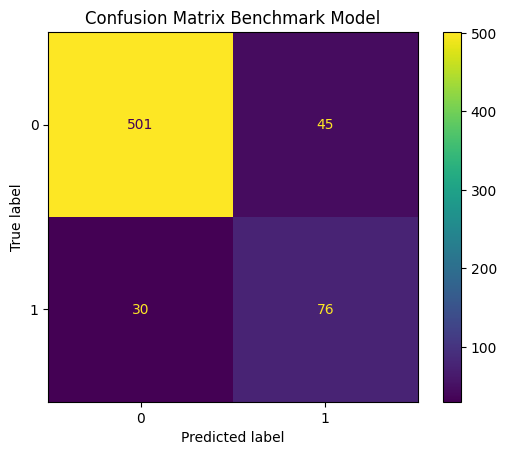

In [147]:
# Confusion Matrix benchmark model

cm_benchmark = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_benchmark))
cm_benchmark.plot()
plt.title("Confusion Matrix Benchmark Model")
plt.show()

Based on the confusion matrix results above, using the DecisionTreeClassifier algorithm (with random_state = 0) and without imbalance treatment (resampling), a recall score of 0.7169 (71.69%) was obtained.

Results:
- False Positives (FP): 45 x $50 = $2,250
- False Negatives (FN): 30 x $250 = $7,500
- Total loss = FP + FN = $2,250 + $7,500 = $9,750

### **Imbalance Treatment**

Due to the imbalance between class 0 and class 1, with a ratio of class 0 (majority) to class 1 (minority) being 5 : 1, imbalance treatment is performed to improve the model's ability to identify the minority class (class 1 / churn). Several resampling methods will be tried, including RandomOverSampler, RandomUnderSampler, SMOTE, and NearMiss, to find the method that produces the best recall score.

In [67]:
# Resampling 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.pipeline import Pipeline

In [68]:
# Define resampling method
ros = RandomOverSampler(random_state = 0)
rus = RandomUnderSampler(random_state = 0)
smote = SMOTE(sampling_strategy = "minority", random_state = 0)
near_miss = NearMiss(sampling_strategy = "majority")

In [69]:
list_imbalance = [ros, rus, smote, near_miss]   
list_recall_imbalance = [] 

for i in list_imbalance:
    
    # Define model
    model = DecisionTreeClassifier(random_state = 0)

    # Pipeline
    pipe_prep_model = Pipeline([("preprocessing", transformer),
                                ("resampling", i),
                                ("modeling", model)
                                ])

    # Fitting
    pipe_prep_model.fit(X_train, y_train)

    # Predict
    y_pred = pipe_prep_model.predict(X_test)

    # Recall score
    recall = recall_score(y_test, y_pred)
    list_recall_imbalance.append(recall)

In [70]:
df_imbalance = pd.DataFrame()
df_imbalance["Resampling Method"] = ["ROS", "RUS", "SMOTE", "NearMiss"]
df_imbalance["Recall Score"] = list_recall_imbalance

df_imbalance.sort_values("Recall Score", ascending = False)

,Resampling Method,Recall Score
1,RUS,0.792453
3,NearMiss,0.792453
2,SMOTE,0.688679
0,ROS,0.622642


Based on the results above, the **RandomUnderSampler** method has the highest recall score compared to other methods. Therefore, this model will use RandomUnderSampler as the resampling method to address data imbalance in the Target or Label.

**RandomUnderSampler**

![RUS](https://miro.medium.com/v2/resize:fit:662/1*RfRHzqUI0753EjN35oI8Zg.png)

RandomUnderSampler is a method used to balance imbalanced datasets by randomly reducing the number of samples from the majority class to match the number of samples from the minority class. This approach aims to reduce the dominance of the majority class in model learning.


In [71]:
# Define model
model = DecisionTreeClassifier(random_state = 0)

# Pipeline
pipe_prep_model = Pipeline([("preprocessing", transformer),
                            ("resampling", rus),
                            ("modeling", model)
                            ])

# Fitting
pipe_prep_model.fit(X_train, y_train)

# Predict
y_pred_rus = pipe_prep_model.predict(X_test)

# Recall score
recall_rus = recall_score(y_test, y_pred_rus)
recall_rus

0.7924528301886793

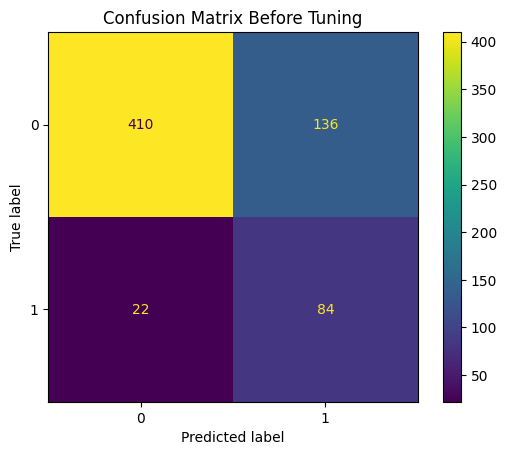

In [146]:
# Confusion Matrix after resampling using Random Under Sampler (RUS)

cm_rus = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rus))
cm_rus.plot()
plt.title("Confusion Matrix Before Tuning")
plt.show()

Based on the above confusion matrix results, using the DecisionTreeClassifier algorithm with random_state = 0 and applying Random Under Sampling (RUS) for resampling, a recall score of 79.2% was achieved.

Results:
- False Positives (FP): 136 x $50 = $6,800
- False Negatives (FN): 22 x $250 = $5,500
- Total loss = FP + FN = $12,300

---

## **10. Hyperparameter Tuning**

In [73]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [74]:
# Define model
model = DecisionTreeClassifier(random_state = 0)

# Hyperparamer Tuning
hyperparam = {
    "modeling__max_depth" : range(2, 21, 1),
    "modeling__min_samples_split" : range(2, 21, 1),
    "modeling__min_samples_leaf" : range(2, 21, 1),
    "modeling__criterion" : ["gini", "entropy", "log_loss"]
}

# Pipeline
pipe_prep_model = Pipeline([
                            ("preprocessing", transformer),
                            ("resampling", rus),
                            ("modeling", model)
                        ])


# Gridsearch
gridsearch = GridSearchCV(
                        estimator = pipe_prep_model,
                        param_grid = hyperparam,
                        cv = 5,
                        n_jobs = -1,
                        scoring = "recall"
                        )

# Fitting gridsearch to X_train, y_train
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHotEncoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('BinaryEncoder',
                                                                         BinaryEncoder(),
                                                                         ['PreferedOrderCat']),
                                                                        ('RobustScaler',
                                                                         RobustScaler(),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberO...
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount'])])),
                                       ('resampling',
                                        RandomUnderSampler(random_state=0)),
                                       ('modeling',
                                        DecisionTreeClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'modeling__criterion': ['gini', 'entropy', 'log_loss'],
                         'modeling__max_depth': range(2, 21),
                         'modeling__min_samples_leaf': range(2, 21),
                         'modeling__min_samples_split': range(2, 21)},
             scoring='recall')

In [75]:
gridsearch.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('BinaryEncoder',
                                                  BinaryEncoder(),
                                                  ['PreferedOrderCat']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('resampling', RandomUnderSampler(random_state=0)),
                ('modeling',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        min_samples_leaf=14, random_state=0))])

In [76]:
gridsearch.best_params_

{'modeling__criterion': 'entropy',
 'modeling__max_depth': 8,
 'modeling__min_samples_leaf': 14,
 'modeling__min_samples_split': 2}

In [77]:
gridsearch.best_score_

0.7958413132694938

Based on the results of hyperparameter tuning using GridSearchCV, the best DecisionTreeClassifier model was found with the following parameters:
- `criterion`: 'entropy'
- `max_depth`: 8
- `min_samples_leaf`: 14
- `min_samples_split`: 2
- `random_state`: 0

Explanation of each parameter:
- `criterion`: This parameter determines the method used for measuring the quality of a split at each node in the tree. **'Entropy'** is one of the criteria used, which measures the impurity within the dataset, aiming to produce splits that are more pure or homogeneous.

- `max_depth`: This parameter determines the maximum depth allowed for the decision tree. Deeper trees have more potential to learn complex patterns in the training data, but they also risk overfitting.

- `min_samples_leaf`: This parameter specifies the minimum number of samples required to be at a leaf node in the decision tree. In other words, every leaf node in the decision tree must have at least min_samples_leaf samples. If, after a split, the number of samples in a node falls below min_samples_leaf, that split will not be performed, and the node will be treated as a leaf. Therefore, this parameter influences the complexity of the decision tree by controlling how large the tree can grow.

- `min_samples_split`: This parameter controls the minimum number of samples required to split an internal node. A smaller value will result in a more complex tree with more splits, while a larger value will produce a simpler tree with fewer splits. If min_samples_split is too small, the model may become overly complex and prone to overfitting, whereas if it's too large, the model may become too simple and fail to capture important patterns in the data.

**Recall Score (Train & Test)**

In [152]:
# Define model
best_model = gridsearch.best_estimator_

# Fitting
best_model.fit(X_train, y_train)

# Predict
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

recall_train =  recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

print(f"Recall score train = {recall_train}")
print(f"Recall score test = {recall_test}")

Recall score train = 0.8685446009389671
Recall score test = 0.9622641509433962


Based on the recall score results, it shows that the recall score on the train set is 0.86 (86%) and on the test set it increases to 0.96 (96%). These results indicate that the model is fairly stable and not underfitting (poor recall scores in both) or overfitting (good recall score in train, but poor in test).

---

## **11. Predict to Test**

**Before Tuning**

In [137]:
# Define model
model = DecisionTreeClassifier(random_state = 0)

# Pipeline
pipe_prep_model = Pipeline([("preprocessing", transformer),
                            ("resampling", rus),
                            ("modeling", model)
                            ])

# Fit
pipe_prep_model.fit(X_train, y_train)

# Predict
y_pred_rus_before = pipe_prep_model.predict(X_test)

# Recall score
recall_rus_before = recall_score(y_test, y_pred_rus_before)
recall_rus_before

0.7924528301886793

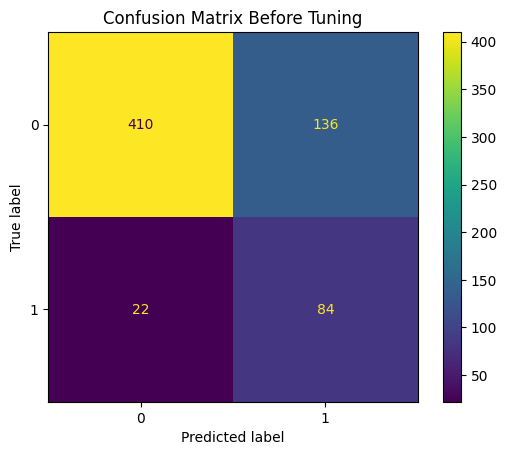

In [138]:
# Confusion Matrix before tuning

cm_before_tuning = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rus_before))
cm_before_tuning.plot()
plt.title("Confusion Matrix Before Tuning")
plt.show()

**Before Tuning Result**

Based on the confusion matrix above, using the DecisionTreeClassifier algorithm with random_state = 0 and applying Random Under Sampling (RUS) resampling method, a recall score of 0.79 (79%) was achieved.

Results:
- False Positives (FP): 136 x $50 = $6,800
- False Negatives (FN): 22 x $250 = $5,500
- Total loss = FP + FN = $12,300

**After Tuning**

In [80]:
gridsearch.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('BinaryEncoder',
                                                  BinaryEncoder(),
                                                  ['PreferedOrderCat']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('resampling', RandomUnderSampler(random_state=0)),
                ('modeling',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        min_samples_leaf=14, random_state=0))])

In [140]:
# Define model
best_model = gridsearch.best_estimator_

# Fitting
best_model.fit(X_train, y_train)

# Predict
y_pred_rus_after = best_model.predict(X_test)

# Recall score
recall_rus_after = recall_score(y_test, y_pred_rus_after)
recall_rus_after

0.9622641509433962

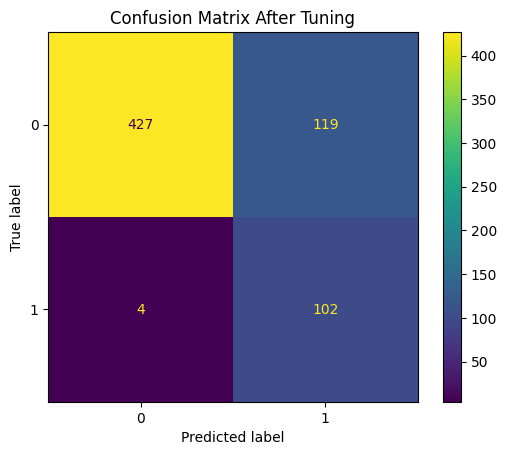

In [141]:
# Confusion Matrix after tuning

cm_after_tuning = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rus_after))
cm_after_tuning.plot()
plt.title("Confusion Matrix After Tuning")
plt.show()

**After Tuning Result**

Based on the confusion matrix above, using the DecisionTreeClassifier algorithm with random_state = 0 and after tuning, the best parameters obtained were:
{'modeling__criterion': 'entropy',
 'modeling__max_depth': 8,
 'modeling__min_samples_leaf': 14,
 'modeling__min_samples_split': 2}
and applying the Random Under Sampling (RUS) resampling method, a recall score of 0.962 (96.2%) was achieved.

Results:
- False Positives (FP): 119 x $50 = $5,950
- False Negatives (FN): 4 x $250 = $1,000
- Total loss = FP + FN = $6,950

**Loss Comparison**

- Model (without resampling / no treatment) = $9,750 
- Model (after resampling & before hyperparameter tuning) = $12,300
- Model (after resampling & after hyperparameter tuning) = $6,950 

Therefore, the best model to use is the one that has been tuned because it has the highest prediction accuracy and generates the smallest loss value.

In [83]:
# Classification report
from sklearn.metrics import classification_report

In [84]:
report_before_tuning = classification_report(y_test, y_pred_rus_before)
report_after_tuning = classification_report(y_test, y_pred_rus_after)

print("Classification Report Before Tuning : \n", report_before_tuning)
print("Classification Report After Tuning : \n", report_after_tuning)

Classification Report Before Tuning : 
               precision    recall  f1-score   support

           0       0.95      0.75      0.84       546
           1       0.38      0.79      0.52       106

    accuracy                           0.76       652
   macro avg       0.67      0.77      0.68       652
weighted avg       0.86      0.76      0.79       652

Classification Report After Tuning : 
               precision    recall  f1-score   support

           0       0.99      0.78      0.87       546
           1       0.46      0.96      0.62       106

    accuracy                           0.81       652
   macro avg       0.73      0.87      0.75       652
weighted avg       0.90      0.81      0.83       652



Based on the classification report, it can be seen that the recall score before tuning was only 0.79, and after tuning, the recall score increased to 0.96.

---

## **12. Decision Tree Plot**

In [85]:
from sklearn.tree import plot_tree

In [86]:
gridsearch.best_params_

{'modeling__criterion': 'entropy',
 'modeling__max_depth': 8,
 'modeling__min_samples_leaf': 14,
 'modeling__min_samples_split': 2}

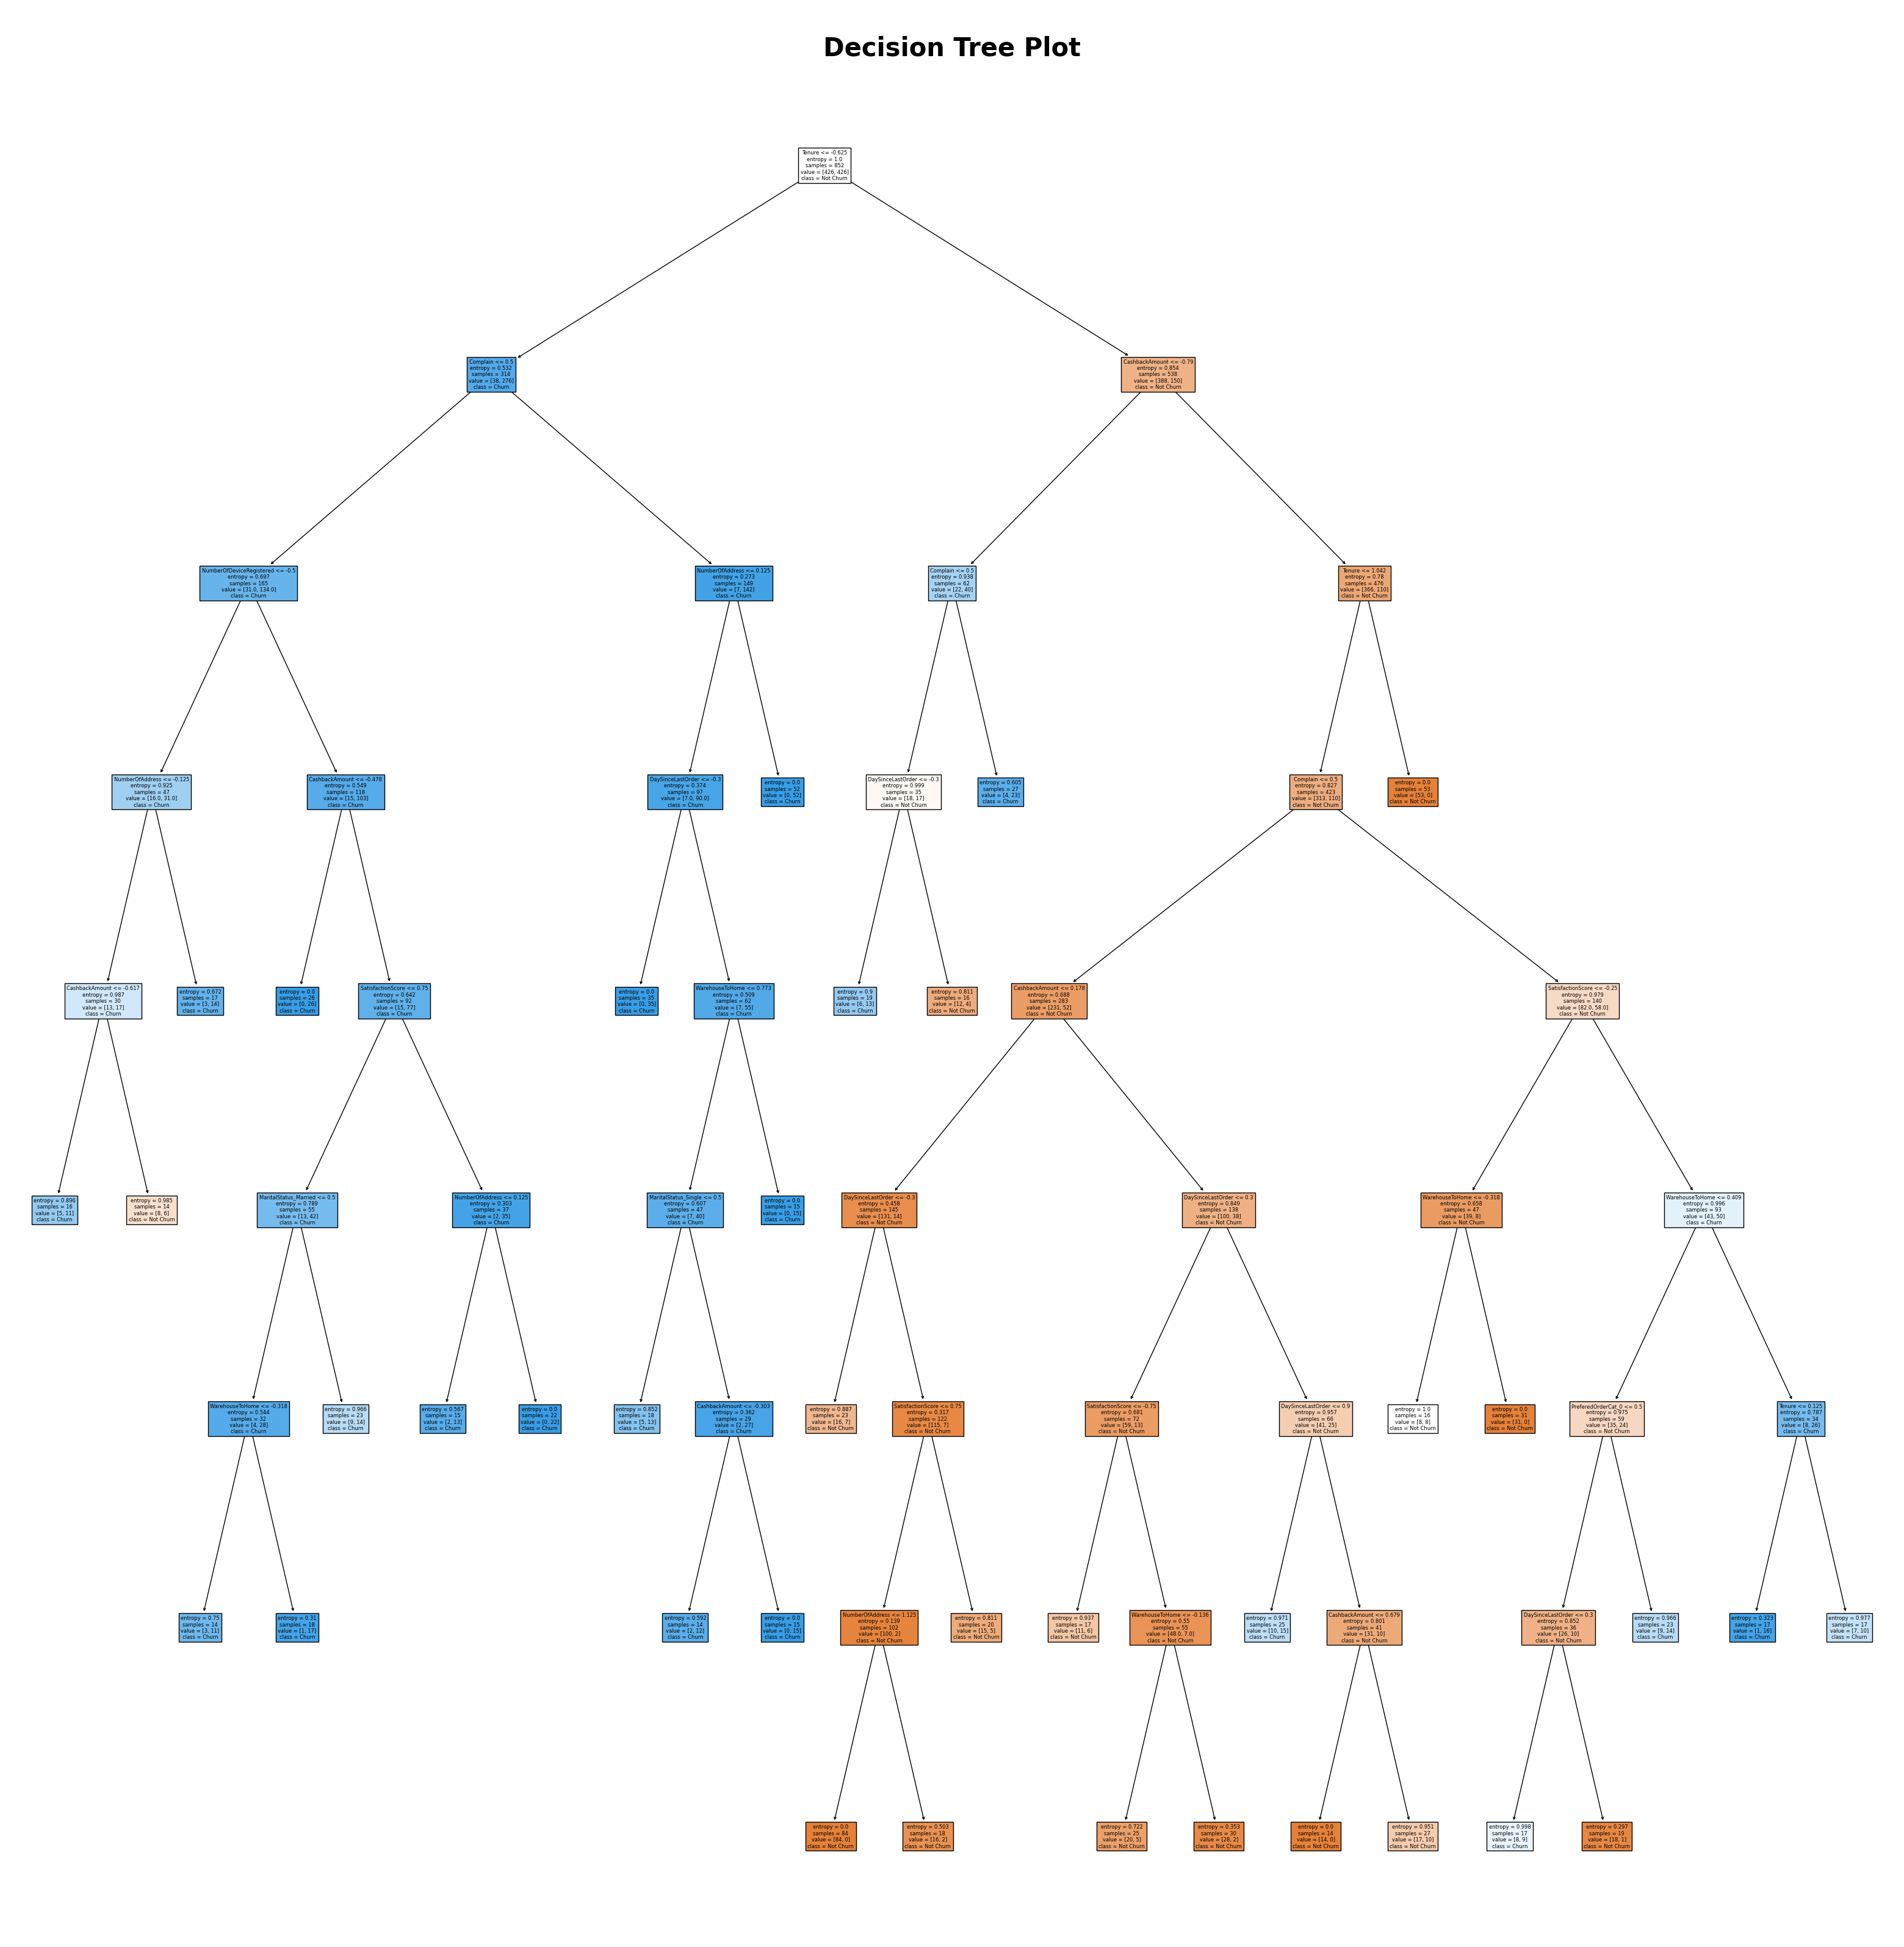

In [145]:
plt.figure(figsize = (40, 40))
plot_tree(gridsearch.best_estimator_["modeling"],
          feature_names = list_columns,
          class_names = ["Not Churn", "Churn"],
          filled=True);
plt.title("\nDecision Tree Plot", fontsize = 30, weight = "bold")
plt.show()

Based on the above tree plot, it can be concluded that:
- Customers with `Tenure` <= -0.625,
- `Complain` <= 0.5,
- `NumberofDeviceRegistered` <= -0.5,
- `NumberOfAddress` <= -0.125,
- `CashbackAmount` <= -0.617, are predicted to `Churn`,
- Whereas `CashbackAmount` > -0.617, are predicted to `Not Churn`.

---

## **13. Feature Importance**

In [88]:
best_model["modeling"].feature_importances_

array([0.00801691, 0.00570212, 0.00976857, 0.        , 0.        ,
       0.53260252, 0.06180065, 0.0141428 , 0.0613586 , 0.03128006,
       0.07629663, 0.12239643, 0.07663472])

In [89]:
list_columns

['MaritalStatus_Married',
 'MaritalStatus_Single',
 'PreferedOrderCat_0',
 'PreferedOrderCat_1',
 'PreferedOrderCat_2',
 'Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'DaySinceLastOrder',
 'CashbackAmount',
 'Complain']

In [90]:
df_feature_importance = pd.DataFrame()
df_feature_importance["Feature"] = list_columns
df_feature_importance["Score"] = best_model["modeling"].feature_importances_

df_feature_importance = df_feature_importance.sort_values("Score", ascending = False)
df_feature_importance

,Feature,Score
5,Tenure,0.532603
11,CashbackAmount,0.122396
12,Complain,0.076635
10,DaySinceLastOrder,0.076297
6,WarehouseToHome,0.061801
8,SatisfactionScore,0.061359
9,NumberOfAddress,0.031280
7,NumberOfDeviceRegistered,0.014143
2,PreferedOrderCat_0,0.009769
0,MaritalStatus_Married,0.008017


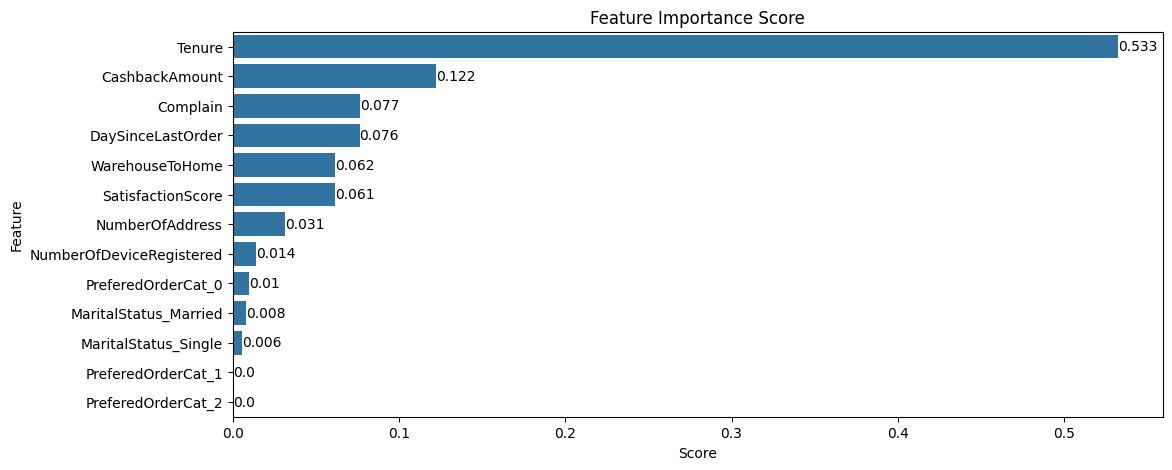

In [91]:
plt.figure(figsize = (12, 5))

plt.title("Feature Importance Score")

bar_feature = sns.barplot(data = df_feature_importance, x = "Score", y = "Feature")

for index, value in enumerate(df_feature_importance["Score"]):
    plt.text(x = value, y = index, s = round(value,3), va = "center")

plt.show()

Based on the results above, it can be concluded that:

- Customer acquisition cost is 5 times greater than customer retention cost. Therefore, the e-commerce company should focus on identifying factors influencing customer churn and prioritize customer retention efforts.
- The feature that has the greatest impact on customer churn is `Tenure` with a value of 0.533.
- Thus, the e-commerce company should pay attention to `Tenure` to minimize customer churn rate, as high churn rates can reduce profitability and long-term sustainability of the company.

---

## **14. Shap**

In [92]:
import shap 

In [93]:
X_train_encoded = pd.DataFrame(data = gridsearch.best_estimator_["preprocessing"].fit_transform(X_train), columns = gridsearch.best_estimator_["preprocessing"].get_feature_names_out())
X_train_encoded

,OneHotEncoder__MaritalStatus_Married,OneHotEncoder__MaritalStatus_Single,BinaryEncoder__PreferedOrderCat_0,BinaryEncoder__PreferedOrderCat_1,BinaryEncoder__PreferedOrderCat_2,RobustScaler__Tenure,RobustScaler__WarehouseToHome,RobustScaler__NumberOfDeviceRegistered,RobustScaler__SatisfactionScore,RobustScaler__NumberOfAddress,RobustScaler__DaySinceLastOrder,RobustScaler__CashbackAmount,remainder__Complain
0,1.0,0.0,0.0,0.0,1.0,0.916667,-0.363636,-1.0,0.0,1.75,2.0,1.471107,1.0
1,1.0,0.0,0.0,1.0,0.0,0.333333,-0.545455,-1.0,-0.5,-0.25,0.0,1.142631,0.0
2,1.0,0.0,0.0,1.0,1.0,0.166667,-0.090909,0.0,0.0,0.00,0.8,-0.203786,0.0
3,0.0,1.0,1.0,0.0,0.0,-0.500000,0.000000,-1.0,0.5,-0.50,-0.2,-0.667261,0.0
4,1.0,0.0,1.0,0.0,1.0,0.416667,-0.636364,0.0,0.0,-0.25,1.4,2.545346,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,1.0,0.0,0.0,0.0,1.0,1.666667,0.181818,1.0,0.5,0.00,-0.4,1.928437,1.0
2603,0.0,0.0,1.0,0.0,0.0,0.000000,0.909091,0.0,0.5,-0.25,-0.6,-0.836951,0.0
2604,1.0,0.0,0.0,1.0,1.0,0.583333,0.090909,-1.0,0.5,0.50,-0.6,-0.314005,0.0
2605,1.0,0.0,0.0,1.0,1.0,-0.750000,2.000000,-1.0,0.0,0.75,-0.6,-0.404996,0.0


In [94]:
y_train

1245    0
647     0
1776    0
2226    0
2101    0
       ..
1772    0
936     0
189     0
2245    0
2723    1
Name: Churn, Length: 2607, dtype: int64

In [95]:
best_model["modeling"]

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=14,
                       random_state=0)

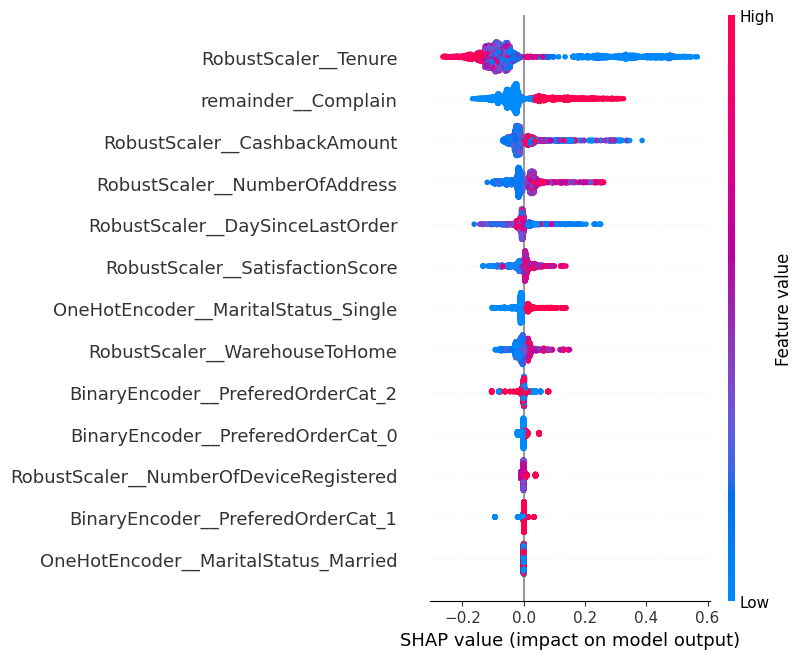

In [96]:
# Fitting best_model to X_train_encoded, y_train
best_model_shap = best_model["modeling"].fit(X_train_encoded, y_train)

shap_values = shap.TreeExplainer(best_model_shap).shap_values(X_train_encoded)

# Transforming the initial 3D array of shap_values from (2607, 13, 2) into a 2D array (2607, 13)
shap_values_plot = shap_values.transpose()[-1].transpose()

shap.summary_plot(shap_values_plot, X_train_encoded)

Based on the summary plot of SHAP values above, the following conclusions can be drawn:

- `Tenure`: The shorter the tenure of customers using e-commerce services, the more likely they are to churn.
- `Complain`: Customers who make complaints are more likely to churn.
- `CashbackAmount`: Customers with shorter tenure and higher cashback amounts tend to churn, while those with lower cashback amounts tend to not churn (based on the above EDA results). Customers with longer tenure are generally not affected by the cashback amount (whether it's high or low).
- `NumberOfDeviceRegistered`: The higher the number of registered devices, the more likely customers are to churn.
- `DaySinceLastOrder`: The shorter the time since the last order, the more likely customers are to churn.
- `SatisfactionScore`: Higher satisfaction scores from customers indicate a higher likelihood of churn.
- `MaritalStatus`: Single customers are more likely to churn.
- `WarehouseToHome`: The farther the distance from the warehouse to the customer's home, the more likely customers are to churn.

---

## **15. Force Plot - Predict to Test**

In [97]:
X_test_encoded = pd.DataFrame(transformer.transform(X_test), columns = list_columns)
X_test_encoded

,MaritalStatus_Married,MaritalStatus_Single,PreferedOrderCat_0,PreferedOrderCat_1,PreferedOrderCat_2,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,DaySinceLastOrder,CashbackAmount,Complain
0,1.0,0.0,0.0,1.0,1.0,-0.083333,0.000000,1.0,0.5,1.25,-0.4,0.130043,0.0
1,0.0,1.0,0.0,1.0,1.0,0.666667,-0.272727,-1.0,0.5,1.75,0.0,-0.082466,0.0
2,1.0,0.0,1.0,1.0,0.0,-0.416667,0.090909,0.0,0.0,0.00,-0.4,-0.510457,0.0
3,0.0,1.0,0.0,1.0,0.0,0.083333,0.181818,1.0,1.0,0.00,1.4,0.741005,0.0
4,1.0,0.0,0.0,0.0,1.0,1.750000,2.000000,0.0,-0.5,0.25,-0.6,1.540093,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0.0,0.0,1.0,0.0,0.0,-0.166667,0.000000,-1.0,1.0,0.50,-0.2,-0.790366,0.0
648,1.0,0.0,0.0,1.0,1.0,-0.083333,-0.545455,-2.0,-0.5,-0.25,0.0,1.164833,0.0
649,0.0,1.0,1.0,1.0,0.0,0.666667,0.363636,0.0,-0.5,-0.25,1.0,-0.276341,0.0
650,1.0,0.0,1.0,1.0,0.0,-0.416667,-0.545455,0.0,0.0,-0.25,0.2,-0.353851,0.0


In [98]:
y_test

2376    0
1660    0
2482    0
1991    0
888     0
       ..
2085    1
1883    0
1953    0
1665    0
199     0
Name: Churn, Length: 652, dtype: int64

In [99]:
# To show force plot
shap.initjs()

In [100]:
# Function force_plot

def force_plot(index, model, test):

    # Define explainer
    explainerModel = shap.TreeExplainer(model)

    # Shap values for a specific desired row
    shap_values = explainerModel.shap_values(test)

    shap_values_model = shap_values.transpose()[-1].transpose()

    # Force plot
    p = shap.plots.force(explainerModel.expected_value[-1], shap_values_model[index], test.iloc[[index]])

    return(p)

In [101]:
y_test.reset_index(drop = True)

0      0
1      0
2      0
3      0
4      0
      ..
647    1
648    0
649    0
650    0
651    0
Name: Churn, Length: 652, dtype: int64

In [102]:
# Adding a new column 'Actual' indicating the customer status

X_test_encoded["Actual"] = y_test.reset_index(drop = True)

In [103]:
X_test_encoded

,MaritalStatus_Married,MaritalStatus_Single,PreferedOrderCat_0,PreferedOrderCat_1,PreferedOrderCat_2,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,DaySinceLastOrder,CashbackAmount,Complain,Actual
0,1.0,0.0,0.0,1.0,1.0,-0.083333,0.000000,1.0,0.5,1.25,-0.4,0.130043,0.0,0
1,0.0,1.0,0.0,1.0,1.0,0.666667,-0.272727,-1.0,0.5,1.75,0.0,-0.082466,0.0,0
2,1.0,0.0,1.0,1.0,0.0,-0.416667,0.090909,0.0,0.0,0.00,-0.4,-0.510457,0.0,0
3,0.0,1.0,0.0,1.0,0.0,0.083333,0.181818,1.0,1.0,0.00,1.4,0.741005,0.0,0
4,1.0,0.0,0.0,0.0,1.0,1.750000,2.000000,0.0,-0.5,0.25,-0.6,1.540093,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0.0,0.0,1.0,0.0,0.0,-0.166667,0.000000,-1.0,1.0,0.50,-0.2,-0.790366,0.0,1
648,1.0,0.0,0.0,1.0,1.0,-0.083333,-0.545455,-2.0,-0.5,-0.25,0.0,1.164833,0.0,0
649,0.0,1.0,1.0,1.0,0.0,0.666667,0.363636,0.0,-0.5,-0.25,1.0,-0.276341,0.0,0
650,1.0,0.0,1.0,1.0,0.0,-0.416667,-0.545455,0.0,0.0,-0.25,0.2,-0.353851,0.0,0


In [104]:
list_min = []
list_max = []
list_unique = []

for i in X_test_encoded.columns:
    min_values = X_test_encoded[i].min()
    max_values = X_test_encoded[i].max()
    unique_values = X_test_encoded[i].unique()

    list_min.append(min_values)
    list_max.append(max_values)
    list_unique.append(unique_values)

In [105]:
# DataFrame containing the minimum and maximum values from X_test_encoded
# Used to facilitate interpretation for several columns resulting from scaling

X_test_encoded_min_max = pd.DataFrame()
X_test_encoded_min_max["Columns"] = X_test_encoded.columns
X_test_encoded_min_max["Min Values"] = list_min
X_test_encoded_min_max["Max Values"] = list_max
X_test_encoded_min_max["Unique Values"] = list_unique

X_test_encoded_min_max

,Columns,Min Values,Max Values,Unique Values
0,MaritalStatus_Married,0.000000,1.000000,"[1.0, 0.0]"
1,MaritalStatus_Single,0.000000,1.000000,"[0.0, 1.0]"
2,PreferedOrderCat_0,0.000000,1.000000,"[0.0, 1.0]"
3,PreferedOrderCat_1,0.000000,1.000000,"[1.0, 0.0]"
4,PreferedOrderCat_2,0.000000,1.000000,"[1.0, 0.0]"
5,Tenure,-0.750000,1.833333,"[-0.08333333333333333, 0.6666666666666666, -0...."
6,WarehouseToHome,-0.727273,2.090909,"[0.0, -0.2727272727272727, 0.09090909090909091..."
7,NumberOfDeviceRegistered,-3.000000,2.000000,"[1.0, -1.0, 0.0, 2.0, -2.0, -3.0]"
8,SatisfactionScore,-1.000000,1.000000,"[0.5, 0.0, 1.0, -0.5, -1.0]"
9,NumberOfAddress,-0.500000,2.000000,"[1.25, 1.75, 0.0, 0.25, 0.75, -0.25, 0.5, 1.5,..."


**Predict Customer Index-25**

In [106]:
# Customer index number 25 in the DataFrame X_test_encoded
X_test_encoded.loc[25]

MaritalStatus_Married       0.000000
MaritalStatus_Single        0.000000
PreferedOrderCat_0          0.000000
PreferedOrderCat_1          1.000000
PreferedOrderCat_2          0.000000
Tenure                     -0.666667
WarehouseToHome            -0.545455
NumberOfDeviceRegistered    1.000000
SatisfactionScore           0.000000
NumberOfAddress             1.000000
DaySinceLastOrder           0.000000
CashbackAmount              1.340073
Complain                    0.000000
Actual                      1.000000
Name: 25, dtype: float64

In [107]:
# Force plot for customer index-25

print(f"The prediction must predict this customer is: {('Churn' if X_test_encoded.loc[25, 'Actual'] == 1 else 'Not Churn')} from y_test")
force_plot(25, best_model["modeling"], X_test_encoded)

The prediction must predict this customer is: Churn from y_test


- Red color indicates factors that drive customers to be predicted as **churn** (to the right).
- Blue color indicates factors that drive customers to be predicted as **not-churn** (to the left).

Based on the characteristics shown by customer index-25 (predicted as **churn**), it can be observed that:

**Factors driving the prediction of churn**:
- `Tenure` = -0.667 (low) --> Customers with low tenure are more likely to churn.
- `CashbackAmount` = 1.34 (mid to high) --> Customers with low tenure and high cashback amounts are more likely to churn.

**Factors driving the prediction of not-churn**:
- `WarehouseToHome` = -0.5455 (low) --> Proximity of the warehouse to the customer's home reduces the likelihood of churn.
- `Complain` = 0 --> Customers who did not file any complaints are less likely to churn.
- `MaritalStatus_Single` = 0 --> Customers who are not single are less likely to churn. Single customers tend to have a higher churn rate compared to those who are married or divorced.
- `NumberOfAddress` = 1 --> Customers with fewer registered addresses are less likely to churn compared to those with multiple addresses.

Customer index-25 is predicted as churn due to the significant influence of `Tenure` and `CashbackAmount`, as indicated by the feature importance analysis.

**Predict Customer Index-35**

In [108]:
# Customer index number 35 in the DataFrame X_test_encoded
X_test_encoded.loc[35]

MaritalStatus_Married       1.000000
MaritalStatus_Single        0.000000
PreferedOrderCat_0          0.000000
PreferedOrderCat_1          1.000000
PreferedOrderCat_2          1.000000
Tenure                     -0.083333
WarehouseToHome            -0.181818
NumberOfDeviceRegistered    0.000000
SatisfactionScore           0.000000
NumberOfAddress             2.000000
DaySinceLastOrder           0.000000
CashbackAmount              0.533056
Complain                    0.000000
Actual                      0.000000
Name: 35, dtype: float64

In [109]:
# Force plot for customer index-35

print(f"The prediction must predict this customer is: {('Churn' if X_test_encoded.loc[35, 'Actual'] == 1 else 'Not Churn')} from y_test")
force_plot(35, best_model["modeling"], X_test_encoded)

The prediction must predict this customer is: Not Churn from y_test


Based on the characteristics shown by customer index-35 (predicted as **not-churn**), it can be observed that:

**Factors indicating a prediction of churn**:
- `NumberOfAddress` = 2 --> Customers registering 2, 3, 7, 8, 9, 10, and 11 addresses tend to have a higher likelihood of churn (as observed from EDA results).

**Factors indicating a prediction of not-churn**:
- `Tenure` = -0.08333 (medium to high) --> Customers with a relatively long tenure are less likely to churn.
- `Complain` = 0 --> Customers who did not file any complaints are less likely to churn.
- `MaritalStatus_Single` = 0 --> Customers who are not single are less likely to churn. Single customers tend to have a higher churn rate compared to those who are married or divorced. 

Customer index-35 is predicted as not-churn primarily due to the longer tenure and absence of complaints, which are factors contributing to customer retention.

---

## **15. Save Final Model**

In [130]:
import pickle

In [111]:
# Best model 
best_model = gridsearch.best_estimator_

# Fitting
best_model.fit(X, y)

# Save with pickle
pickle.dump(best_model, open("best_model.sav", "wb"))

In [132]:
# Load model
model_loaded = pickle.load(open("/Users/stefanusfelix/Documents/Capstone Modul 3/best_model.sav", "rb"))
model_loaded

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('BinaryEncoder',
                                                  BinaryEncoder(),
                                                  ['PreferedOrderCat']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('resampling', RandomUnderSampler(random_state=0)),
                ('modeling',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        min_samples_leaf=14, random_state=0))])

---

## **16. Conclusion**

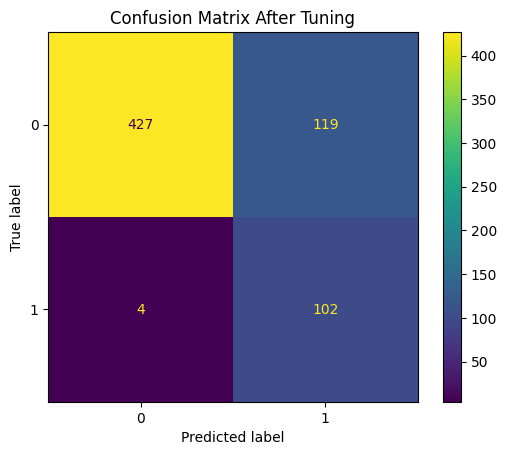

In [135]:
# Confusion Matrix best model (after tuning)
cm_after_tuning.plot()
plt.title("Confusion Matrix After Tuning")
plt.show()

In [114]:
# Classification Report best model  

report_after_tuning = classification_report(y_test, y_pred_rus_after)
print("Classification Report After Tuning : \n", report_after_tuning)

Classification Report After Tuning : 
               precision    recall  f1-score   support

           0       0.99      0.78      0.87       546
           1       0.46      0.96      0.62       106

    accuracy                           0.81       652
   macro avg       0.73      0.87      0.75       652
weighted avg       0.90      0.81      0.83       652



From the above classification report, it can be concluded that:

- Class 1 (churn): The model has a high recall (0.96), but lower precision (0.46), indicating that the model is good at identifying customers who churn but may also make some prediction errors with false positives.
- The accuracy of this model is **81%** (0.81), which is the proportion of total correct predictions out of all predictions made (TP + TN / (TP + TN + FP + FN)).

| Model | FP Cost ($50) | FN Cost ($250) | Total Cost
| --- | --- | --- | --- |
| Without Machine Learning Model |  $32,600 (652) | $0 (0) | $32,600 |
| Model (before resampling & before tuning) | $2,250 (45) | $7,500 (30) | $9,750 |
| Model (after resampling & before tuning) | $6,800 (136) | $5,500 (22) | $12,300 |
| Model (after resampling & after tuning) | $5,950 (119) | $250 (4) | $6,950 |


- Based on the e-commerce company's objective to address customer churn issues, where **customer retention cost : customer acquisition cost = 1 : 5**, **customer acquisition cost** is 5 to 7 times higher than **customer retention cost**. Therefore, the company would prefer to focus efforts on retaining existing customers rather than incurring higher costs to acquire new customers to replace those who churn.

- Utilizing a machine learning model capable of predicting whether a customer will churn or not can help the e-commerce company save expenses. Based on the company's objective to reduce **False Negatives (customers predicted as not-churn but actually churn)**, the machine learning model will use **recall** as its scoring method. According to the recall scoring formula, a higher recall score indicates fewer False Negatives (FN).

- Based on the analysis above, the best model identified is the tuned DecisionTreeClassifier with parameters: `criterion='entropy'`, `max_depth=8`, `min_samples_leaf=14`, `min_samples_split=2`, `random_state=0`, achieving a recall score of **0.96**. It is observed that using the tuned model reduced the number of **False Negatives (FN)** to 4, compared to 22 FN in the untuned model. The cost incurred by the company also significantly reduced to $6,950.

- By employing this machine learning model, the company saves costs that would otherwise be spent on customer retention efforts. Without the model, the company would need to spend $50 on retention efforts for each customer, totaling $32,600. With the model, the company saves $25,650 ($32,600 - $6,950) by efficiently targeting the appropriate customers for retention efforts.

- Furthermore, providing additional promotions or rewards to customers predicted as **churn** but are actually **not-churn** (False Positives) has the potential to increase the retention rate. According to research (https://blog.nextsale.io/customer-retention/), a 5% increase in customer retention rate can potentially increase company profitability by 25 - 95%. Hence, the model demonstrates reliability in predicting customer churn for e-commerce companies. According to feature importance, `Tenure` has the most significant impact on customer churn, indicating that customers with shorter tenure are more likely to churn.

- Based on the **feature importance** results, factors that e-commerce companies should pay attention to are `Tenure` (0.533), `CashbackAmount` (0.122), and `Complain` (0.077). These three factors have a notable influence on customer churn. It is evident that customers with shorter `Tenure` are more likely to churn. Customers with shorter `Tenure` and higher `CashbackAmount` tend to churn. Additionally, customers who lodge complaints are more likely to churn. Therefore, based on these findings, e-commerce companies can devise appropriate strategies to mitigate the risk of customer churn based on factors significantly impacting churn behavior.

---

## **17. Recommendation**

**Recommendations for the e-commerce company**:

a) Focus on maintaining customer tenure: Based on the analysis, customers with shorter tenure and receiving high cashback amounts ($100 - $300) are more likely to churn. This happens because customers may be attracted primarily by cashback offers. To encourage customers to stay, it would be beneficial for the company not to offer large cashbacks upfront but to distribute them periodically. For instance, a $250 cashback could be split into $50 over 5 months, encouraging sustained purchasing activity on the e-commerce platform.

b) Collaboration with sellers: Implement a reward system for sellers who achieve specific sales targets by reducing administrative fees. Here's an example calculation:

**Bronze Sellers:**
- Total sales: 0 - 1000 products
- Administrative fee: 15%

**Silver Sellers:**
- Total sales: 1000 - 5000 products
- Administrative fee: 13%

**Gold Sellers:**
- Total sales: > 5000 products
- Administrative fee: 10%

Implementing this strategy motivates sellers to promote their products more actively to increase sales and qualify for lower administrative fees, benefiting both the e-commerce company and the sellers.

c) Implementing a membership system: This aims to increase customer loyalty and allows the company to tailor cashback or reward amounts based on customer transaction volumes. Here’s a hypothetical calculation:

**Bronze Members:**
- Total transactions: $25,000 / month
- Number of members: 500
- Average spending: $25,000 / 500 = $50 / month
- **Discount**: 2%
- **Profit**: 10% - 2% = 8%

**Silver Members:**
- Total transactions: $22,500 / month
- Number of members: 300
- Average spending: $22,500 / 300 = $75 / month
- **Discount**: 3%
- **Profit**: 10% - 3% = 7%

**Gold Members:**
- Total transactions: $25,000 / month
- Number of members: 250
- Average spending: $25,000 / 250 = $100 / month
- **Discount**: 5%
- **Profit**: 10% - 5% = 5%

Based on the analysis, it is evident that customers are more likely to churn if the warehouse is far from their address due to higher shipping costs, which reduce customer interest. Therefore, offering additional rewards such as free shipping for minimum purchases can encourage customers to shop more to qualify for free shipping.

d) Enhance service quality: The e-commerce company should focus on improving service quality by responding promptly to customer complaints, enhancing clarity and transparency in the purchasing process, and providing a seamless and enjoyable customer experience. This effort aims to reduce customer complaints, which are potential indicators of churn.

e) Utilize the developed machine learning model: The company can leverage the machine learning model to analyze customer data and identify behavioral patterns that predict customer churn or retention. With insights from the model, the company can take preventive actions to retain potentially churn-prone customers, such as offering special deals or increasing interaction with these customers. Moreover, the machine learning model aids in more effectively and efficiently allocating costs for customer retention efforts, targeting the right customers with personalized retention strategies.

**Recommendations for the next model and analysis**:

a) Adding additional relevant features related to customer purchasing behavior in e-commerce, such as purchase frequency or the number of products viewed before purchase, can provide further insights into churn patterns among e-commerce customers. This enhancement can help create a more accurate prediction model to classify customers into churn and non-churn categories.

b) Consider exploring other resampling methods. Due to the imbalanced nature of the data, it is important to address this issue with resampling techniques. In this analysis, RandomUnderSampler was used. However, for future analyses, exploring other resampling methods such as RandomOverSampler, SMOTE, and NearMiss could be beneficial.

c) Explore different machine learning algorithms. While Decision Tree was utilized in this analysis, future analyses could explore other algorithms such as Logistic Regression, k-Nearest Neighbors, GradientBoosting, XGBoost, and others. It is hoped that by exploring various machine learning models, a comparison can be made to find the best prediction model.

d) Include additional parameters in hyperparameter tuning. In this analysis, only four parameters ('criterion', 'max_depth', 'min_samples_leaf', 'min_samples_split') were used for Decision Tree algorithm tuning. Therefore, future research could include more parameters or expand the range of parameters (with caution to avoid overfitting).

e) Consider augmenting data for the minority class (class 1 / churn). Adding more data for churn instances can help the model better recognize and understand churn patterns, potentially leading to a more robust model.

These recommendations aim to enhance the accuracy and effectiveness of the churn prediction model in e-commerce, contributing to improved customer retention strategies and operational efficiency.